<a href="https://colab.research.google.com/github/allenthemartian/SQL/blob/main/SEMS_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
from google.colab.output import eval_js

def set_cell_size(height=250):
  '''
  Sets the colab cell output size.  

  Default:
     `height` = 250
  
  Imports:
    `from google.colab.output import eval_js`
  '''
  height = str(height)
  return eval_js(f"google.colab.output.setIframeHeight({height})")

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import matplotlib
from matplotlib.ticker import MaxNLocator
from matplotlib.transforms import Bbox
from datetime import datetime
import re

In [5]:
f1 = "/content/drive/MyDrive/Pricol/Pricol/Secondary Order Details/All/Clean/peil_clean.csv"
f2 = "/content/drive/MyDrive/Pricol/Pricol/Secondary Order Details/All/Clean/pricol_clean.csv"
f3 = "/content/drive/MyDrive/Pricol/Pricol/Secondary Order Details/All/Clean/xenos_clean.csv"

In [6]:
filepath = "/content/drive/MyDrive/Pricol/Pricol/Secondary Order Details/All/Clean/all_clean.csv"

In [7]:
def d_parser(x):
  return datetime.strptime(x, '%Y-%m-%d')

In [8]:
# # peil
# df1 = pd.read_csv(f1, parse_dates=['order_date'], date_parser=d_parser)

# # pricol  
# df2 = pd.read_csv(f2, parse_dates=['order_date'], date_parser=d_parser)  

# # xenos
# df3 = pd.read_csv(f3, parse_dates=['order_date'], date_parser=d_parser)

In [9]:
# df = pd.concat([df1, df2, df3], ignore_index=True)

In [10]:
df = pd.read_csv(filepath,  parse_dates=['order_date'], date_parser=d_parser)

In [11]:
df.head()

Unnamed: 0   order_id order_date  day day_of_week  month  year  year_month  \
0           0  CP0001584 2019-12-31   31     Tuesday     12  2019      201912   
1           1  CP0001584 2019-12-31   31     Tuesday     12  2019      201912   
2           2  CP0001584 2019-12-31   31     Tuesday     12  2019      201912   
3           3  CP0001586 2019-12-31   31     Tuesday     12  2019      201912   
4           4  CP0001588 2019-12-31   31     Tuesday     12  2019      201912   

   quarter customer_type                         shop_name executive_name  \
0        4      retailer     shribeeralingeswarautomobiles  harishchillal   
1        4      retailer     shribeeralingeswarautomobiles  harishchillal   
2        4      retailer     shribeeralingeswarautomobiles  harishchillal   
3        4      retailer   tamilnaduautomobiles-dharmapuri       aravinth   
4        4      retailer  jayalakshmiautowings-dharamapuri       aravinth   

  distributor_name   part_no               part_name segment  quantity  \
0  omegaautomotive  PEAD3280         Pressure Switch     4WH         5   
1  omegaautomotive  PEAD3512       Stop Light Switch     4WH         4   
2  omegaautomotive  PEAD6409  Wind Shield Washer Kit     4WH        10   
3              tvs  PEAD6413  Wind Shield Washer Kit     4WH         1   
4              tvs  PEAD3932         Pressure Switch     4WH         3   

   unit_price  total_price  
0         187          935  
1          84          336  
2         344         3440  
3         995          995  
4         236          708

In [12]:
df.tail()

Unnamed: 0   order_id order_date  day day_of_week  month  year  \
12750       12822  CP0002147 2020-03-02    2      Monday      3  2020   
12751       12823  CP0002147 2020-03-02    2      Monday      3  2020   
12752       12824  CP0002147 2020-03-02    2      Monday      3  2020   
12753       12825  CP0002150 2020-03-02    2      Monday      3  2020   
12754       12826  CP0002151 2020-03-02    2      Monday      3  2020   

       year_month  quarter customer_type        shop_name executive_name  \
12750      202003        1      retailer  johnsonscarcare     manojkumar   
12751      202003        1      retailer  johnsonscarcare     manojkumar   
12752      202003        1      retailer  johnsonscarcare     manojkumar   
12753      202003        1      retailer      jaibholecar     manojkumar   
12754      202003        1      retailer         kingscar     manojkumar   

        distributor_name      part_no              part_name    segment  \
12750  shrinemiplastchem  XE-18000003  VSS (Security System)  4 Wheeler   
12751  shrinemiplastchem  XE-18000005        Car Accessories  4 Wheeler   
12752  shrinemiplastchem  XE-99400042  VSS (Security System)  4 Wheeler   
12753  shrinemiplastchem  XE-97000116  VSS (Security System)  4 Wheeler   
12754  shrinemiplastchem  XE-88000082          Music Systems  4 Wheeler   

       quantity  unit_price  total_price  
12750         2        1190         2380  
12751         1         490          490  
12752         1        4310         4310  
12753         1        6500         6500  
12754         1        2920         2920

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)

In [14]:
df.iloc[0, 1].day_name()

'Tuesday'

# Data Wrangling

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12755 entries, 0 to 12754
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          12755 non-null  object        
 1   order_date        12755 non-null  datetime64[ns]
 2   day               12755 non-null  int64         
 3   day_of_week       12755 non-null  object        
 4   month             12755 non-null  int64         
 5   year              12755 non-null  int64         
 6   year_month        12755 non-null  int64         
 7   quarter           12755 non-null  int64         
 8   customer_type     12755 non-null  object        
 9   shop_name         12721 non-null  object        
 10  executive_name    12755 non-null  object        
 11  distributor_name  12755 non-null  object        
 12  part_no           12755 non-null  object        
 13  part_name         12755 non-null  object        
 14  segment           1275

In [16]:
df.describe()

day         month          year     year_month       quarter  \
count  12755.000000  12755.000000  12755.000000   12755.000000  12755.000000   
mean      15.553508      6.964955   2019.377734  201944.738377      2.655821   
std        7.965900      3.835035      0.485001      45.237957      1.239320   
min        1.000000      1.000000   2019.000000  201906.000000      1.000000   
25%        9.000000      3.000000   2019.000000  201909.000000      1.000000   
50%       16.000000      8.000000   2019.000000  201911.000000      3.000000   
75%       22.000000     10.000000   2020.000000  202002.000000      4.000000   
max       31.000000     12.000000   2021.000000  202101.000000      4.000000   

           quantity    unit_price    total_price  
count  12755.000000  12755.000000   12755.000000  
mean       6.961505    468.642415    1691.383457  
std       17.672198    692.833099    2794.551822  
min        1.000000      4.000000      29.000000  
25%        2.000000    161.000000     528.000000  
50%        3.000000    260.000000     942.000000  
75%       10.000000    494.000000    1800.000000  
max     1000.000000  22000.000000  106000.000000

In [17]:
print(f"Earliest Date: {df['order_date'].min()}")

Earliest Date: 2019-06-13 00:00:00


In [18]:
print(f"Most Recent Date: {df['order_date'].max()}")

Most Recent Date: 2021-01-04 00:00:00


In [19]:
print(f"No. of unique orders in the dataframe: {len(df['order_id'].unique())}")

No. of unique orders in the dataframe: 2382


In [20]:
df.isnull().sum()

order_id             0
order_date           0
day                  0
day_of_week          0
month                0
year                 0
year_month           0
quarter              0
customer_type        0
shop_name           34
executive_name       0
distributor_name     0
part_no              0
part_name            0
segment              0
quantity             0
unit_price           0
total_price          0
dtype: int64

In [21]:
df['customer_type'].value_counts()

retailer       12235
electrician      357
mechanic         129
others            34
Name: customer_type, dtype: int64

# SE Performance Metrics
* Most Valuable **Sales Executive** of All Time  $\checkmark$
* Most Valuable **Sales Executive** for *daterange*  $\checkmark$  
* Sales Trend of individual **Sales Executive** throughout year *daterange* $\checkmark$ 
  * Sales Trend of individual **Sales Executive** throughout year (Rolling avg. - 10)  $\checkmark$
* Compare Sales Performance of **Sales Executive(s)** throughout year (Rolling avg. - 10)  $\checkmark$
* Top $3$ Performing **Sales Executive(s)** on a monthly basis throughout the year   $\checkmark$
* Most signed accounts by **Sales Executive(s)** for *daterange*$\Large^*$  $\checkmark$  
* Customer Profile (Breakup of `customer_type` and count)    

|Dealer|contact_no|customer_type|region|contact_person|regional_manager|    
| - | - | - | - | - | - |  
|jagdambamotor|9929199225|Retailer|North|kamal|Vipin Kaushik|   
|Sardar Motors|9660621110|Retailer|North|Gurpreet Singh|Vipin Kaushik|    


## Executive Chart  
* Sales Performance of individual **Sales Executive(s)** for *daterange*  $\checkmark$  

# Product Performance Metrics

* Growth in Revenue by Sales  $\checkmark$  
  * 10 Days Moving Average Revenue  $\checkmark$  
* Growth in Sales Quantity  $\checkmark$  
  * 10 Days Moving Average Quantity  $\checkmark$  
* Growth in Customer Base  $\checkmark$   
  * 10 Days Moving Average New Customers  $\checkmark$  
* Growth in Transactions  $\checkmark$  
  * 10 Days Moving Transactions Count  $\checkmark$      
_____________
* Revenue by Months  $\checkmark$  
* Quantity Sold by Months  $\checkmark$  
* New Customers by Months  $\checkmark$  
* Transactions Count by Months  $\checkmark$  
_____________
Month-wise Comparison  

* Revenue Comparison  (different year, same month)  $\checkmark$  
* Quantity Sold Comparison  $\checkmark$  
  * %age change between months  $\checkmark$  
* Transactions Count Comparison  $\checkmark$  
_____________
Revenue-Quantity Weekday-Wise Trend (If necessary for specific daterange)  $\checkmark$  
(Common `x-axis`, multiple y-axis, superimposed)   $\checkmark$  
_____________   
(Common `x-axis`, subplots)  
* Revenue-Quantity DayofMonth-wise  $\checkmark$    
* Revenue Quarterly-wise $\checkmark$  
_____________   


In [22]:
print(f"Earliest Date:    {df['order_date'].min()}")
print(f"Most Recent Date: {df['order_date'].max()}")
print(f'Timedelta:        {df["order_date"].max() - df["order_date"].min()}')

Earliest Date:    2019-06-13 00:00:00
Most Recent Date: 2021-01-04 00:00:00
Timedelta:        571 days 00:00:00


In [23]:
#@title Matplotlib version of plotly's fig.update_traces(textposition=outside)
### Copied from justfortherec's answer: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [24]:
#@title add_value_labels_int
### Copied from justfortherec's answer: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart


def add_value_labels_int(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [25]:
def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)


In [26]:
np.sort(df['executive_name'].unique())

array(['aalish', 'ajoyroy', 'aravinth', 'bheemsingh', 'gopalkrishnapanda',
       'gopalkumar', 'harishchillal', 'kaleshwaran', 'kishorekumar',
       'lalitkumar', 'manojkumar', 'nitinkumar', 'parthapaul',
       'piyushkumar', 'pradeepsingh', 'rameshbellani', 'shantanunandy',
       'vignesh'], dtype=object)

In [27]:
#@title Name map
fmt_names = {'aalish':'Aalish',
             'ajoyroy':'Ajoy Roy',
             'aravinth':'Aravinth',
             'bheemsingh':'Bheem Singh',
             'gopalkrishnapanda':'Gopal Krishna Panda',
             'gopalkumar':'Gopal Kumar',
             'harishchillal':'Harish Chillal',
             'kaleshwaran':'Kaleshwaran',
             'kishorekumar':'Kishore Kumar',
             'lalitkumar':'Lalit Kumar',
             'manojkumar':'Manoj Kumar',
             'nitinkumar':'Nitin Kumar',
             'parthapaul':'Partha Paul',
             'piyushkumar':'Piyush Kumar',
             'pradeepsingh':'Pradeep Singh',
             'rameshbellani':'Ramesh Bellani',
             'shantanunandy':'Shantanu Nandy',
             'vignesh':'Vignesh'}

# Sales Executive Performance (17-June-2019 -- 08-Dec-2020)

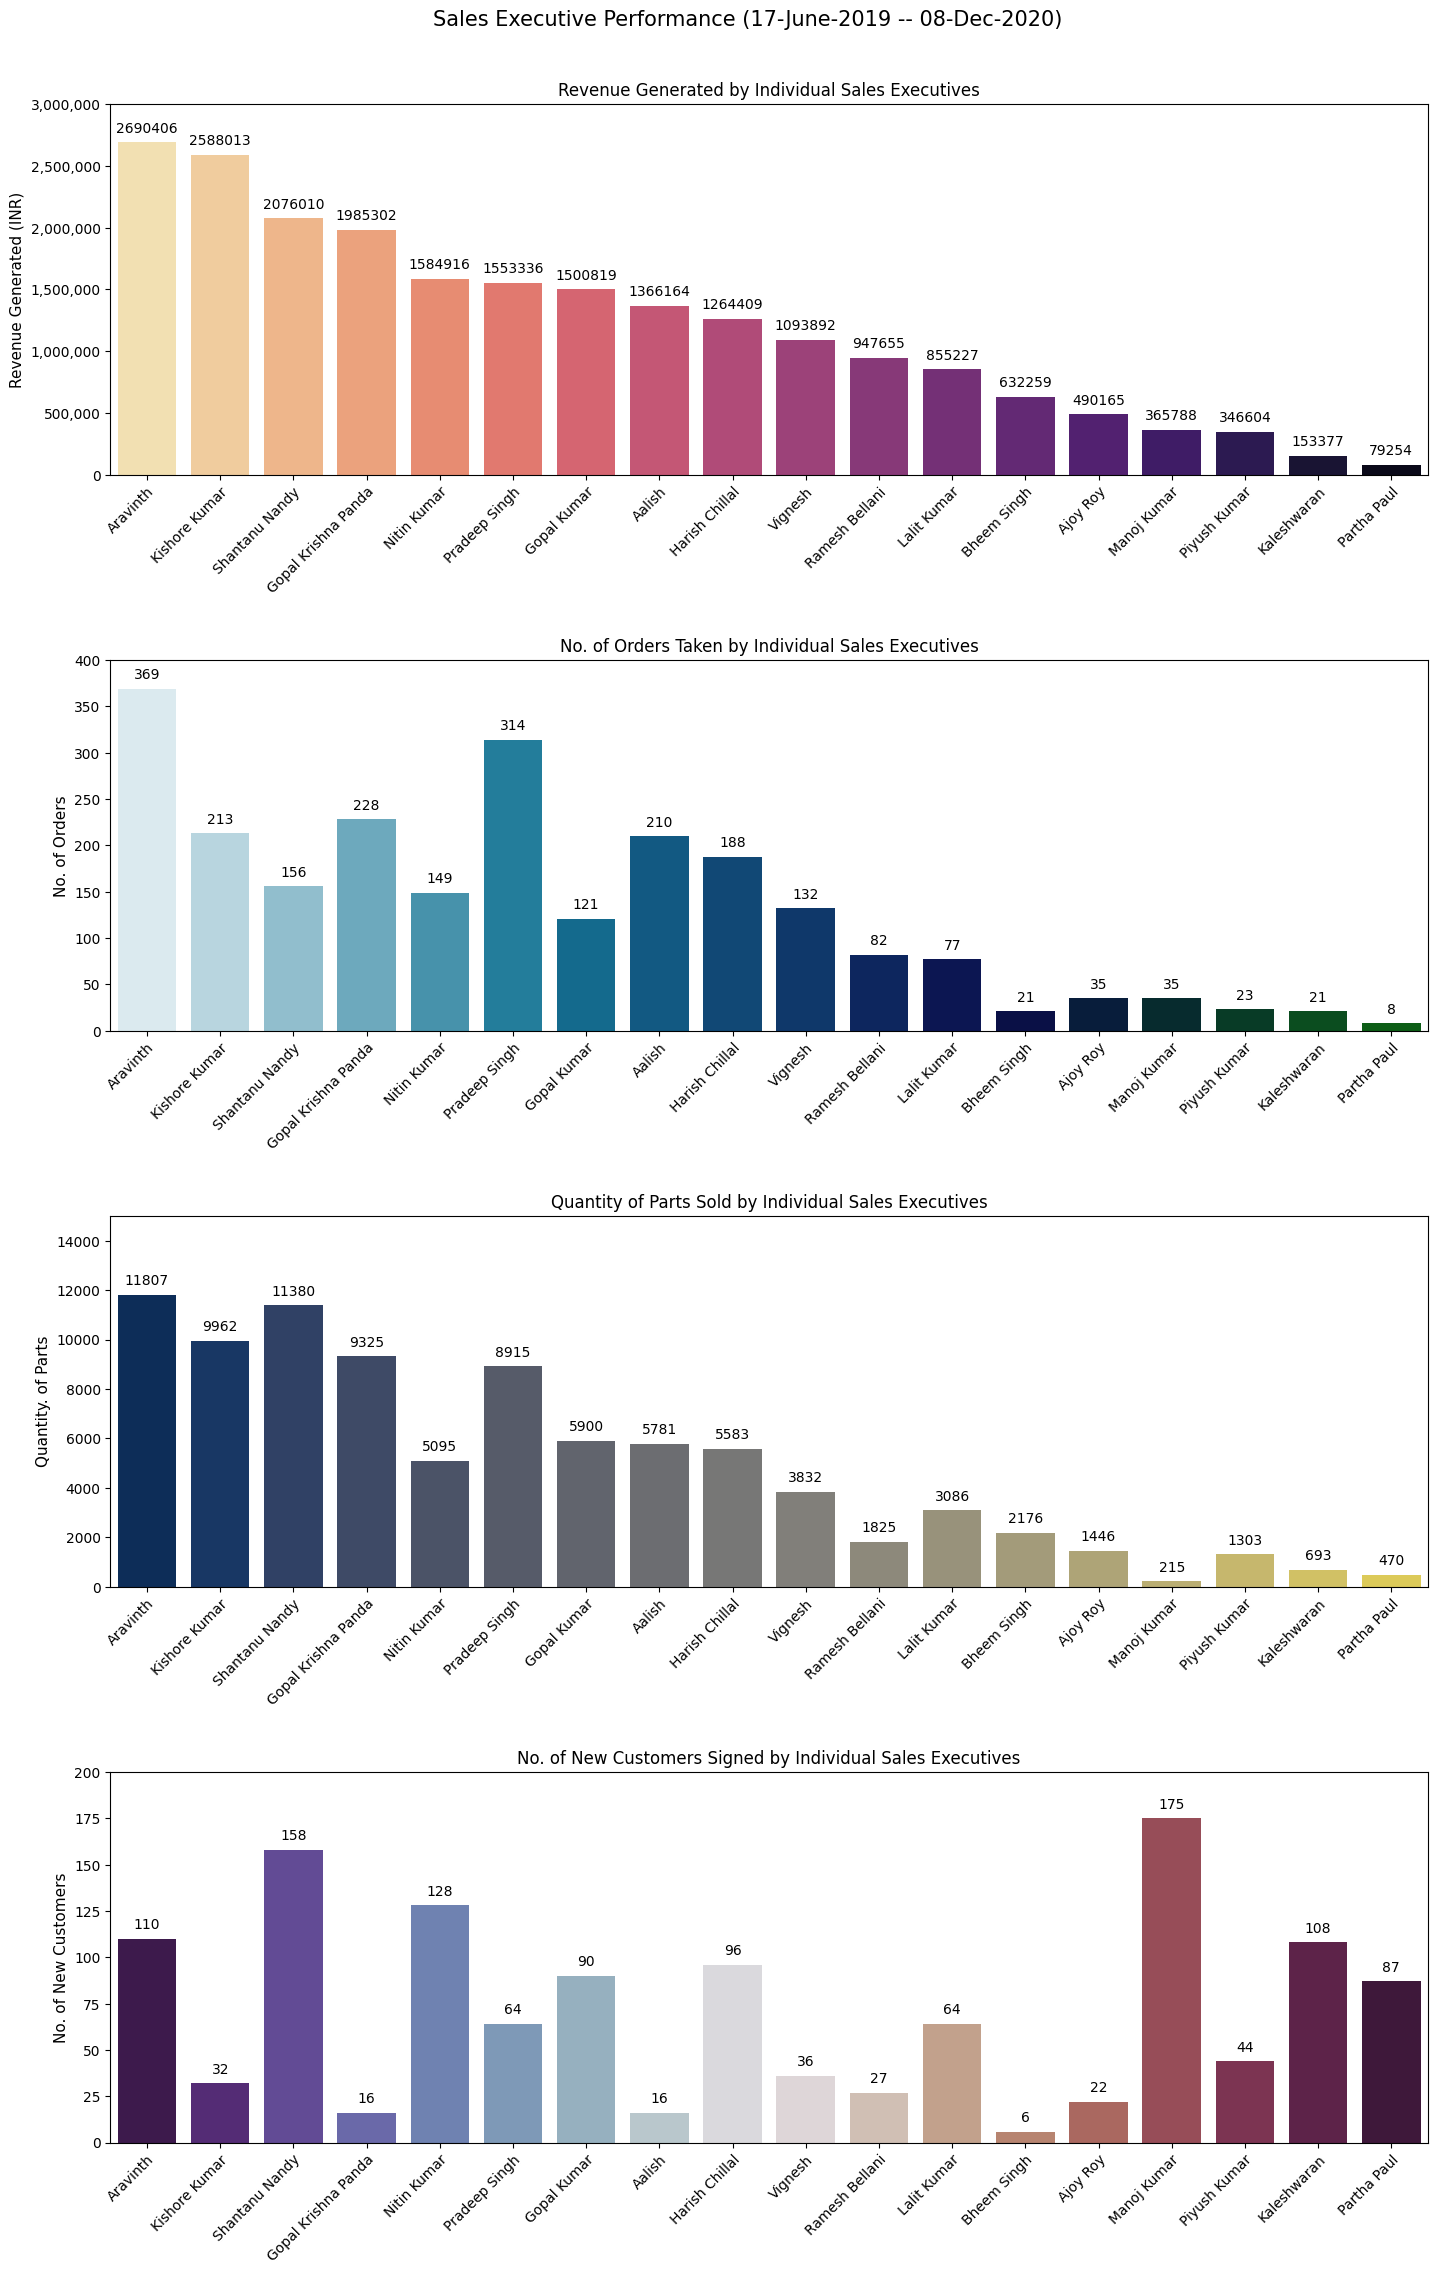

In [28]:
#@title **Sales Executive Performance (17-June-2019 -- 08-Dec-2020)**
# ax[0].ticklabel_format(style='plain', axis='y')
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(17, 27), dpi=100)  

se_perf = df.groupby('executive_name').agg({'total_price':'sum',
                                            'order_id':'nunique',
                                            'quantity':'sum'})
se_perf_rev = se_perf.sort_values(by='total_price', ascending=False)

se_cust_sign = df.groupby('shop_name').first().reset_index()[['executive_name','shop_name']]
se_cust_sign = se_cust_sign.groupby('executive_name').agg({'shop_name':'count'})

# REVENUE
sns.barplot(data=se_perf_rev,
            x=se_perf_rev.index,
            y='total_price',
            palette='magma_r',
            ax=ax[0])

ax[0].set_xlabel('')
ax[0].set_ylabel('Revenue Generated (INR)', size=11)
ax[0].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[0].set_ylim(0, 3000000)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].title.set_text('Revenue Generated by Individual Sales Executives')  
add_value_labels_int(ax[0])  

# NUMBER OF ORDERS
sns.barplot(data=se_perf_rev,
            x=se_perf_rev.index,
            y='order_id',
            palette='ocean_r',
            ax=ax[1])

ax[1].set_xlabel('')
ax[1].set_ylabel('No. of Orders', size=11)
ax[1].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[1].set_ylim(0, 400)
ax[1].title.set_text('No. of Orders Taken by Individual Sales Executives')  
add_value_labels_int(ax[1])  

# NO OF PARTS (QUANTITY)
sns.barplot(data=se_perf_rev,
            x=se_perf_rev.index,
            y='quantity',
            palette='cividis',
            ax=ax[2])

ax[2].set_xlabel('')
ax[2].set_ylabel('Quantity. of Parts', size=11)
ax[2].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[2].set_ylim(0, 15000)
ax[2].title.set_text('Quantity of Parts Sold by Individual Sales Executives')  
add_value_labels_int(ax[2]) 

# NEW CUSTOMERS SIGNED
sns.barplot(data=se_cust_sign,
            x=se_cust_sign.index,
            y='shop_name',
            palette='twilight_shifted',
            ax=ax[3])

ax[3].set_xlabel('')
ax[3].set_ylabel('No. of New Customers', size=11)
ax[3].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[3].set_ylim(0, 200)
ax[3].title.set_text('No. of New Customers Signed by Individual Sales Executives')  
add_value_labels_int(ax[3]) 

fig.suptitle('Sales Executive Performance (17-June-2019 -- 08-Dec-2020)', fontsize=15, y=0.915)
plt.subplots_adjust(hspace=0.5)
fig.savefig('Sales Executive Performance (17-June-2019 -- 08-Dec-2020).jpg')
plt.show()

# **Sales Executive Monthly Performance (08/Dec/2019 - 08/Dec/2020)**

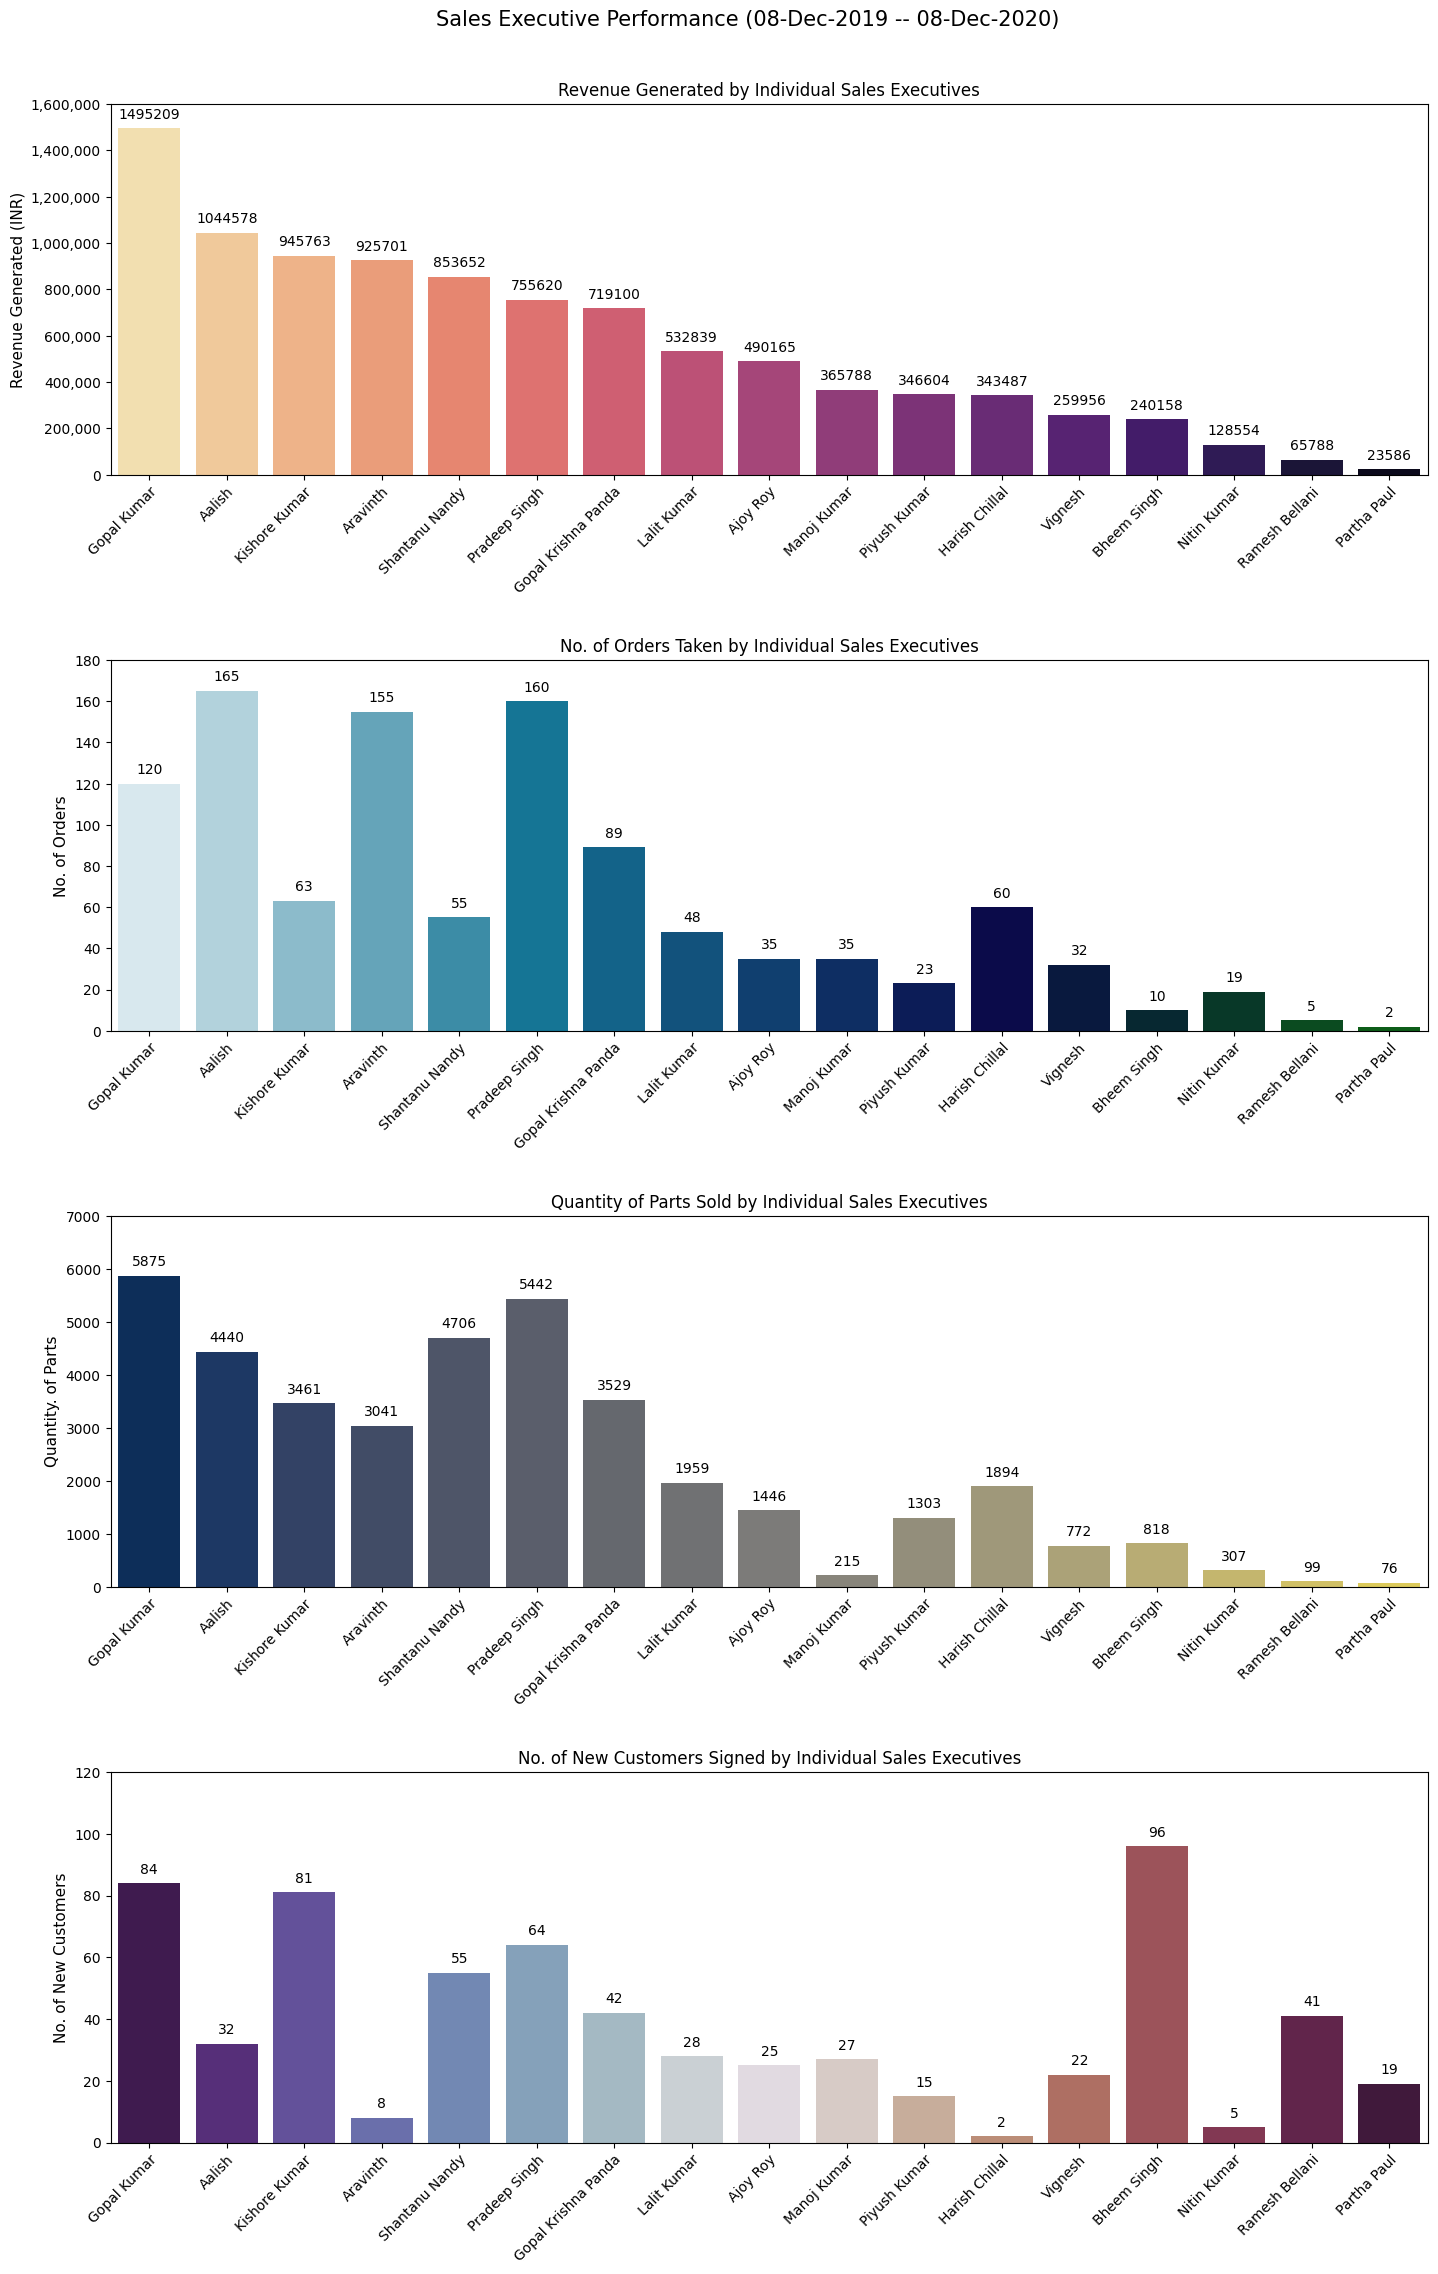

In [29]:
#@title **Sales Executive Monthly Performance (Daterange)**
# ax[0].ticklabel_format(style='plain', axis='y')
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(17, 27), dpi=100)  

# DATERANGE FILTER
filt = (df["order_date"] >= pd.to_datetime('2019-12-08')) & (df["order_date"] < pd.to_datetime('2020-12-08'))
ndf = df[filt]

se_perf = ndf.groupby('executive_name').agg({'total_price':'sum',
                                            'order_id':'nunique',
                                            'quantity':'sum'})
se_perf_rev = se_perf.sort_values(by='total_price', ascending=False)

se_cust_sign = ndf.groupby('shop_name').first().reset_index()[['executive_name','shop_name']]
se_cust_sign = se_cust_sign.groupby('executive_name').agg({'shop_name':'count'})


# REVENUE
sns.barplot(data=se_perf_rev,
            x=se_perf_rev.index,
            y='total_price',
            palette='magma_r',
            ax=ax[0])

ax[0].set_xlabel('')
ax[0].set_ylabel('Revenue Generated (INR)', size=11)
ax[0].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[0].set_ylim(0, 1600000)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].title.set_text('Revenue Generated by Individual Sales Executives')  
add_value_labels_int(ax[0])  

# NUMBER OF ORDERS
sns.barplot(data=se_perf_rev,
            x=[fmt_names.get(i) for i in se_perf_rev.index],
            y='order_id',
            palette='ocean_r',
            ax=ax[1])

ax[1].set_xlabel('')
ax[1].set_ylabel('No. of Orders', size=11)
ax[1].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[1].set_ylim(0, 180)
ax[1].title.set_text('No. of Orders Taken by Individual Sales Executives')  
add_value_labels_int(ax[1])  

# NO OF PARTS (QUANTITY)
sns.barplot(data=se_perf_rev,
            x=se_perf_rev.index,
            y='quantity',
            palette='cividis',
            ax=ax[2])

ax[2].set_xlabel('')
ax[2].set_ylabel('Quantity. of Parts', size=11)
ax[2].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[2].set_ylim(0, 7000)
ax[2].title.set_text('Quantity of Parts Sold by Individual Sales Executives')  
add_value_labels_int(ax[2]) 

# NEW CUSTOMERS SIGNED
sns.barplot(data=se_cust_sign,
            x=se_cust_sign.index,
            y='shop_name',
            palette='twilight_shifted',
            ax=ax[3])

ax[3].set_xlabel('')
ax[3].set_ylabel('No. of New Customers', size=11)
ax[3].set_xticklabels([fmt_names.get(i) for i in se_perf_rev.index],
                      rotation=45, ha='right',
                      rotation_mode='anchor')
ax[3].set_ylim(0, 120)
ax[3].title.set_text('No. of New Customers Signed by Individual Sales Executives')  
add_value_labels_int(ax[3]) 

fig.suptitle('Sales Executive Performance (08-Dec-2019 -- 08-Dec-2020)', fontsize=15, y=0.915)
plt.subplots_adjust(hspace=0.5)
fig.savefig('Sales Executive Performance (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show()

# **Sales Trend of Most Active Executives (08/Dec/2019 - 08/Dec/2020)**
**Executives:** Gopal Kumar, Aalish, Kishore Kumar, Aravinth

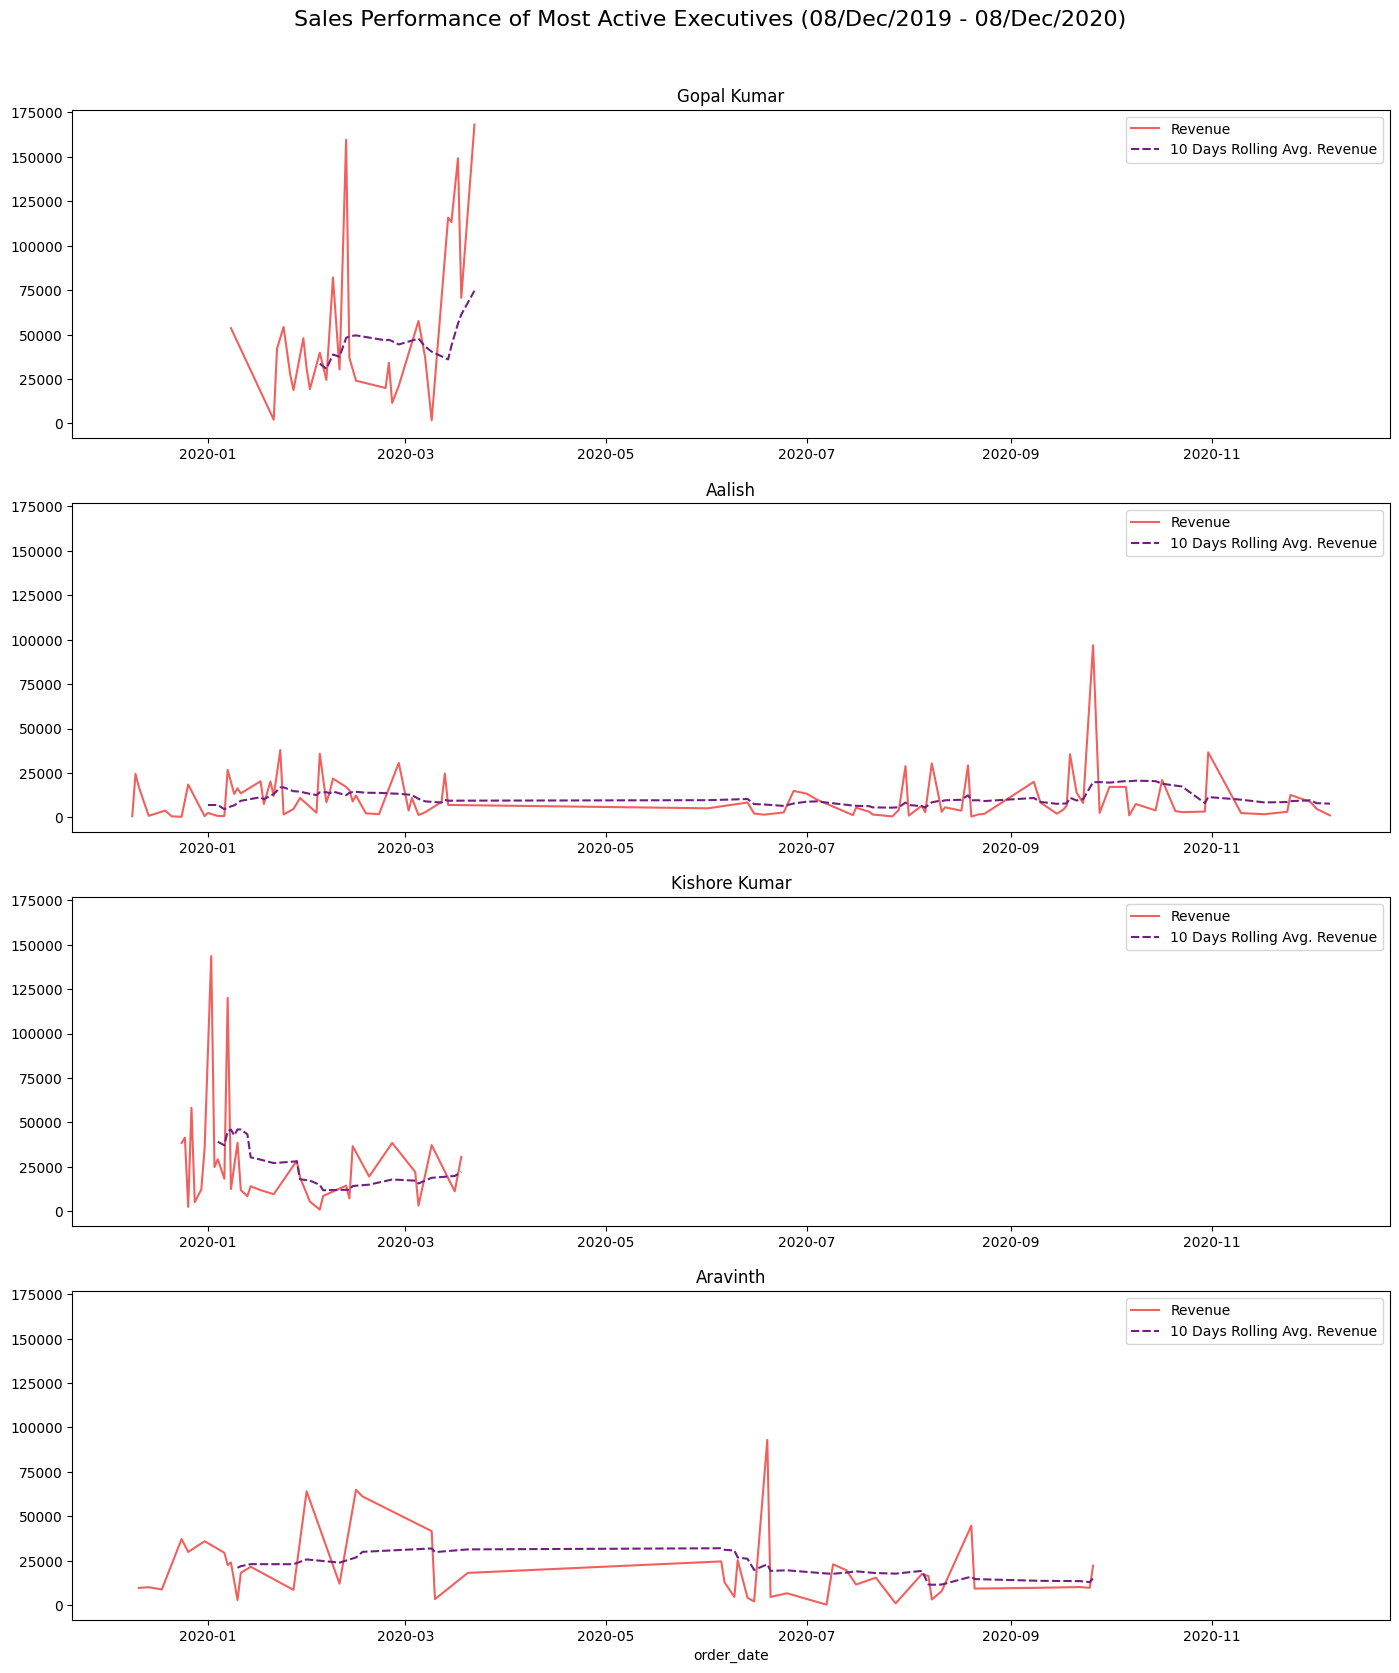

In [30]:
#@title **Sales Trend of Top Performing Executives (08/Dec/2019 - 08/Dec/2020)**
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(17, 20), dpi=100, sharex=True, sharey=True)  

# DATERANGE FILTER
filt = (df["order_date"] >= pd.to_datetime('2019-12-08')) & (df["order_date"] < pd.to_datetime('2020-12-08'))
ndf = df[filt]
filt_df = ndf[ndf['executive_name'].isin(['gopalkumar','aalish', 'kishorekumar', 'aravinth'])]

# Gopal Kumar
gk_df = filt_df[filt_df['executive_name'] == 'gopalkumar'] 
gk_df = gk_df.groupby(gk_df['order_date'].dt.date).agg({'total_price':'sum'})  
gk_df['10_days_rolling_average_revenue'] = gk_df['total_price'].rolling(10).mean()
sns.lineplot(data=gk_df[['total_price', '10_days_rolling_average_revenue']],
             palette='magma_r',
             linewidth=1.5,
             ax=ax[0])

ax[0].title.set_text('Gopal Kumar') 
ax[0].legend(['Revenue', '10 Days Rolling Avg. Revenue'])
ax[0].tick_params(labelbottom=True)

# Pradeep Singh
ps_df = filt_df[filt_df['executive_name'] == 'aalish']       
ps_df = ps_df.groupby(ps_df['order_date'].dt.date).agg({'total_price':'sum'})  
ps_df['10_days_rolling_average_revenue'] = ps_df['total_price'].rolling(10).mean()
sns.lineplot(data=ps_df[['total_price', '10_days_rolling_average_revenue']],
             palette='magma_r',
             linewidth=1.5,
             ax=ax[1])

ax[1].title.set_text('Aalish') 
ax[1].legend(['Revenue', '10 Days Rolling Avg. Revenue'])
ax[1].tick_params(labelbottom=True)

# Shantanu Nandy    
sn_df = filt_df[filt_df['executive_name'] == 'kishorekumar']       
sn_df = sn_df.groupby(sn_df['order_date'].dt.date).agg({'total_price':'sum'})  
sn_df['10_days_rolling_average_revenue'] = sn_df['total_price'].rolling(10).mean()
sns.lineplot(data=sn_df[['total_price', '10_days_rolling_average_revenue']],
             palette='magma_r',
             linewidth=1.5,
             ax=ax[2])

ax[2].title.set_text('Kishore Kumar') 
ax[2].legend(['Revenue', '10 Days Rolling Avg. Revenue'])
ax[2].tick_params(labelbottom=True)

# Aravinth
ar_df = filt_df[filt_df['executive_name'] == 'aravinth']       
ar_df = ar_df.groupby(ar_df['order_date'].dt.date).agg({'total_price':'sum'})  
ar_df['10_days_rolling_average_revenue'] = ar_df['total_price'].rolling(10).mean()
sns.lineplot(data=ar_df[['total_price', '10_days_rolling_average_revenue']],
             palette='magma_r',
             linewidth=1.5)

ax[3].title.set_text('Aravinth')
ax[3].legend(['Revenue', '10 Days Rolling Avg. Revenue']) 
ax[3].tick_params(labelbottom=True)
fig.suptitle('Sales Performance of Most Active Executives (08/Dec/2019 - 08/Dec/2020)', fontsize=16, y=0.93)

fig.savefig('Sales Performance of Most Active Executives (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show()

# `def()` Sales Executive Revenue Performance

In [68]:
# Sales Executive TimeSeries Performance
def se_rev_perf(start_date, end_date):
  '''
  `start_date`: str %y-%m-%d
  `end_date`: str %y-%m-%d
  '''
 
  filt = (df["order_date"] >= pd.to_datetime(start_date)) & (df["order_date"] < pd.to_datetime(end_date))
  ndf = df[filt]

  executive_names = ndf['executive_name'].unique().tolist()
  fig, ax = plt.subplots(nrows=len(executive_names), ncols=1, figsize=(17, 70), dpi=100, sharex=True, sharey=True)  

  for ind, se_name in enumerate(executive_names):
    se_df = ndf[ndf['executive_name'] == se_name]
    se_df = se_df.groupby(ndf['order_date'].dt.date).agg({'total_price':'sum',
                                                          'order_id':'nunique',
                                                          'quantity':'sum'})
    se_df['5_days_rolling_average_revenue'] = se_df['total_price'].rolling(5).mean()
    sns.lineplot(data=se_df[['total_price', '5_days_rolling_average_revenue']],
                palette='magma_r',
                linewidth=1.5,
                ax=ax[ind])
    ax[ind].title.set_text(fmt_names.get(se_name))
    ax[ind].legend(['Revenue', '5 Days Rolling Avg. Revenue'])
    ax[ind].tick_params(labelbottom=True)
  fig.tight_layout()
  fig.suptitle('Sales Executive Revenue Performance (08-Dec-2019 -- 08-Dec-2020)', size=16, y=1.01)
  plt.show()

# **Sales Executive Revenue Performance**

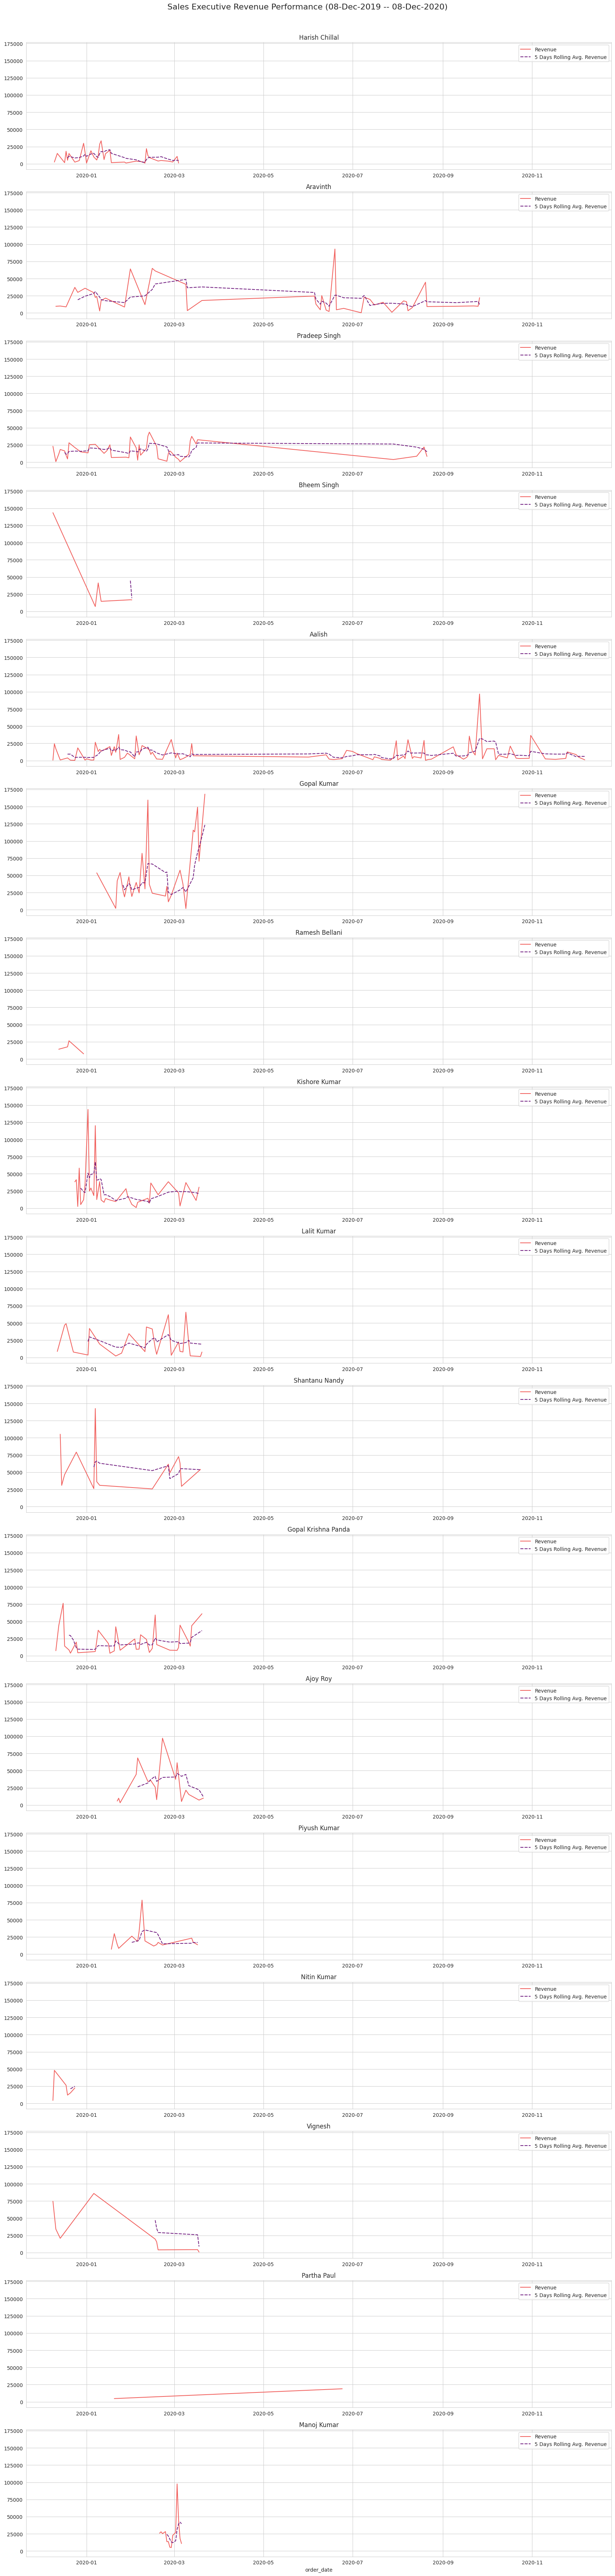

In [70]:
se_rev_perf(start_date='2019-12-08',
            end_date='2020-12-08')

#`def()` Sales Executive No. of Orders Performance


In [33]:
# Sales Executive TimeSeries Performance
def se_n_orders_perf(start_date, end_date):
  '''
  `start_date`: str %y-%m-%d
  `end_date`: str %y-%m-%d
  '''
 
  filt = (df["order_date"] >= pd.to_datetime(start_date)) & (df["order_date"] < pd.to_datetime(end_date))
  ndf = df[filt]

  executive_names = ndf['executive_name'].unique().tolist()
  fig, ax = plt.subplots(nrows=len(executive_names), ncols=1, figsize=(17, 70), dpi=100, sharex=True, sharey=True)  

  for ind, se_name in enumerate(executive_names):
    se_df = ndf[ndf['executive_name'] == se_name]
    se_df = se_df.groupby(ndf['order_date'].dt.date).agg({'total_price':'sum',
                                                          'order_id':'nunique',
                                                          'quantity':'sum'})
    se_df['5_days_rolling_average_n_order'] = se_df['order_id'].rolling(5).mean()
    sns.lineplot(data=se_df[['order_id', '5_days_rolling_average_n_order']],
                palette='ocean_r',
                linewidth=1.5,
                ax=ax[ind])
    ax[ind].title.set_text(fmt_names.get(se_name))
    ax[ind].legend(['No. of Orders', '5 Days Rolling Avg. Orders Taken'])
    ax[ind].tick_params(labelbottom=True)
  fig.tight_layout()
  fig.suptitle('Sales Executive No. of Orders Performance (08-Dec-2019 -- 08-Dec-2020)', size=16, y=1.01)
  fig.savefig('Sales Executive No. of Orders Performance (08-Dec-2019 -- 08-Dec-2020).jpg')
  plt.show()

# **Sales Executive No. of Orders Performance**

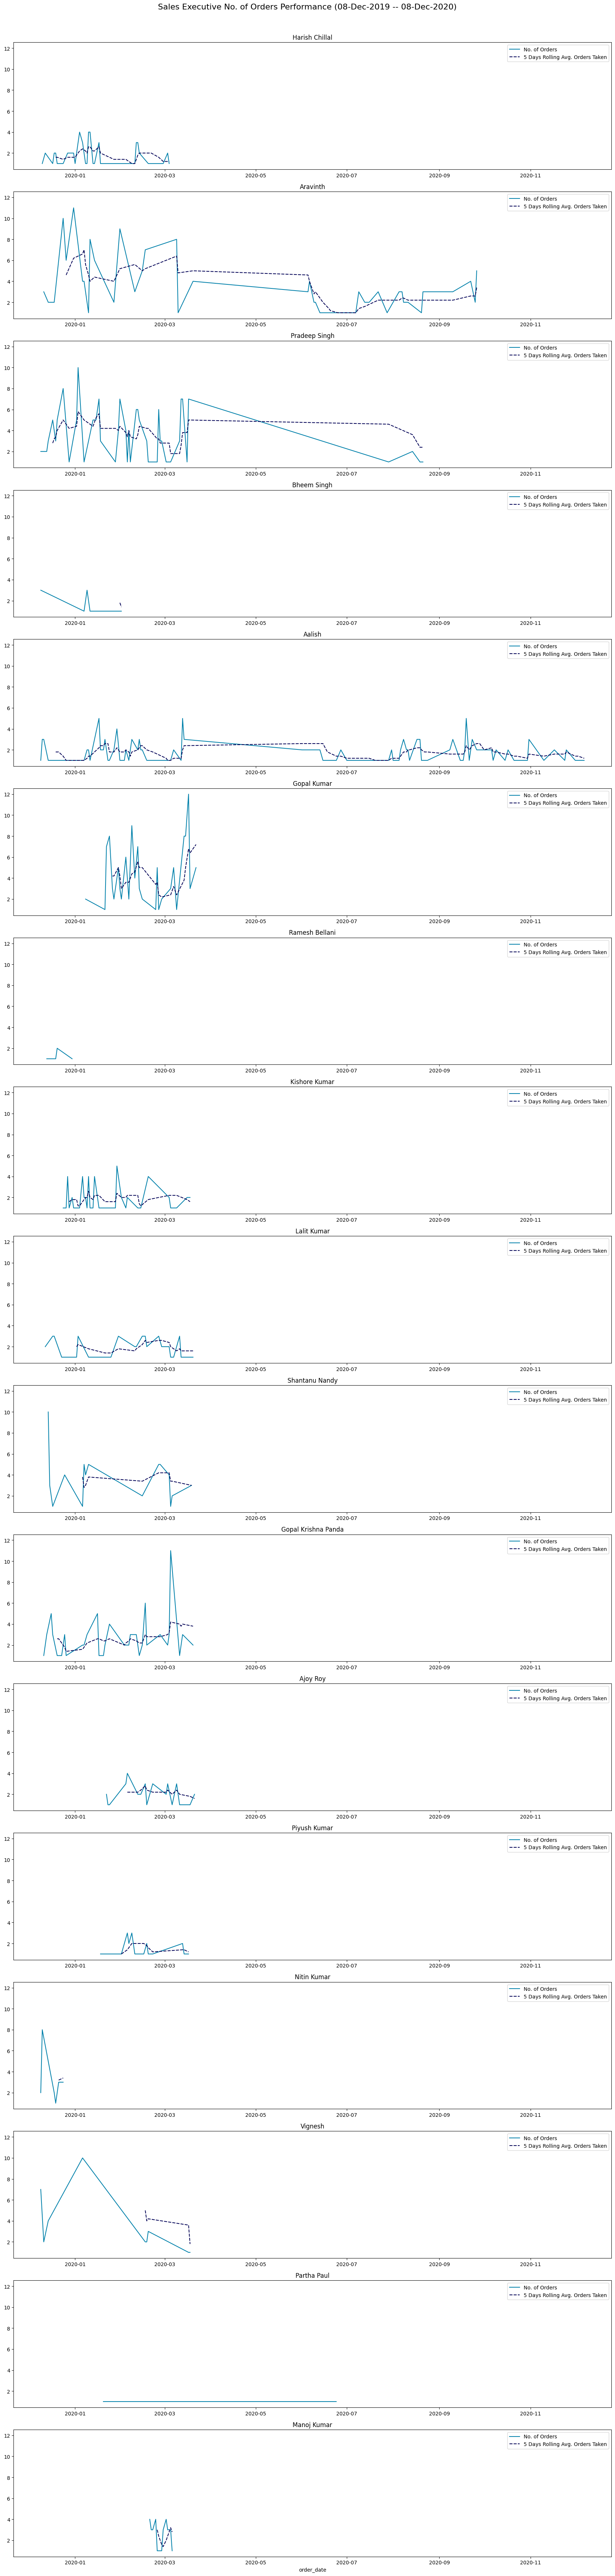

In [34]:
se_n_orders_perf(start_date='2019-12-08',
                 end_date='2020-12-08')

#`def()` Sales Executive No. of Parts Sold Performance

In [35]:
# Sales Executive TimeSeries Performance
def se_n_parts_perf(start_date, end_date):
  '''
  `start_date`: str %y-%m-%d
  `end_date`: str %y-%m-%d
  '''
 
  filt = (df["order_date"] >= pd.to_datetime(start_date)) & (df["order_date"] < pd.to_datetime(end_date))
  ndf = df[filt]

  executive_names = ndf['executive_name'].unique().tolist()
  fig, ax = plt.subplots(nrows=len(executive_names), ncols=1, figsize=(17, 80), dpi=100, sharex=True, sharey=True)  

  for ind, se_name in enumerate(executive_names):
    se_df = ndf[ndf['executive_name'] == se_name]
    se_df = se_df.groupby(ndf['order_date'].dt.date).agg({'total_price':'sum',
                                                          'order_id':'nunique',
                                                          'quantity':'sum'})
    se_df['5_days_rolling_average_n_parts'] = se_df['quantity'].rolling(5).mean()
    sns.lineplot(data=se_df[['quantity', '5_days_rolling_average_n_parts']],
                palette='viridis_r',
                linewidth=1.5,
                ax=ax[ind])
    ax[ind].title.set_text(fmt_names.get(se_name))
    ax[ind].legend(['No. of Parts', '5 Days Rolling Avg. Quantity of Parts Sold'])
    ax[ind].tick_params(labelbottom=True)
  fig.tight_layout()
  plt.xlabel('Order Date')
  fig.suptitle('Sales Executive No. of Parts Sold Performance (08-Dec-2019 -- 08-Dec-2020)', size=16, y=1.01)
  fig.savefig('Sales Executive No. of Parts Sold Performance (08-Dec-2019 -- 08-Dec-2020).jpg')
  plt.show()

# **Sales Executive No. of Parts Sold Performance**

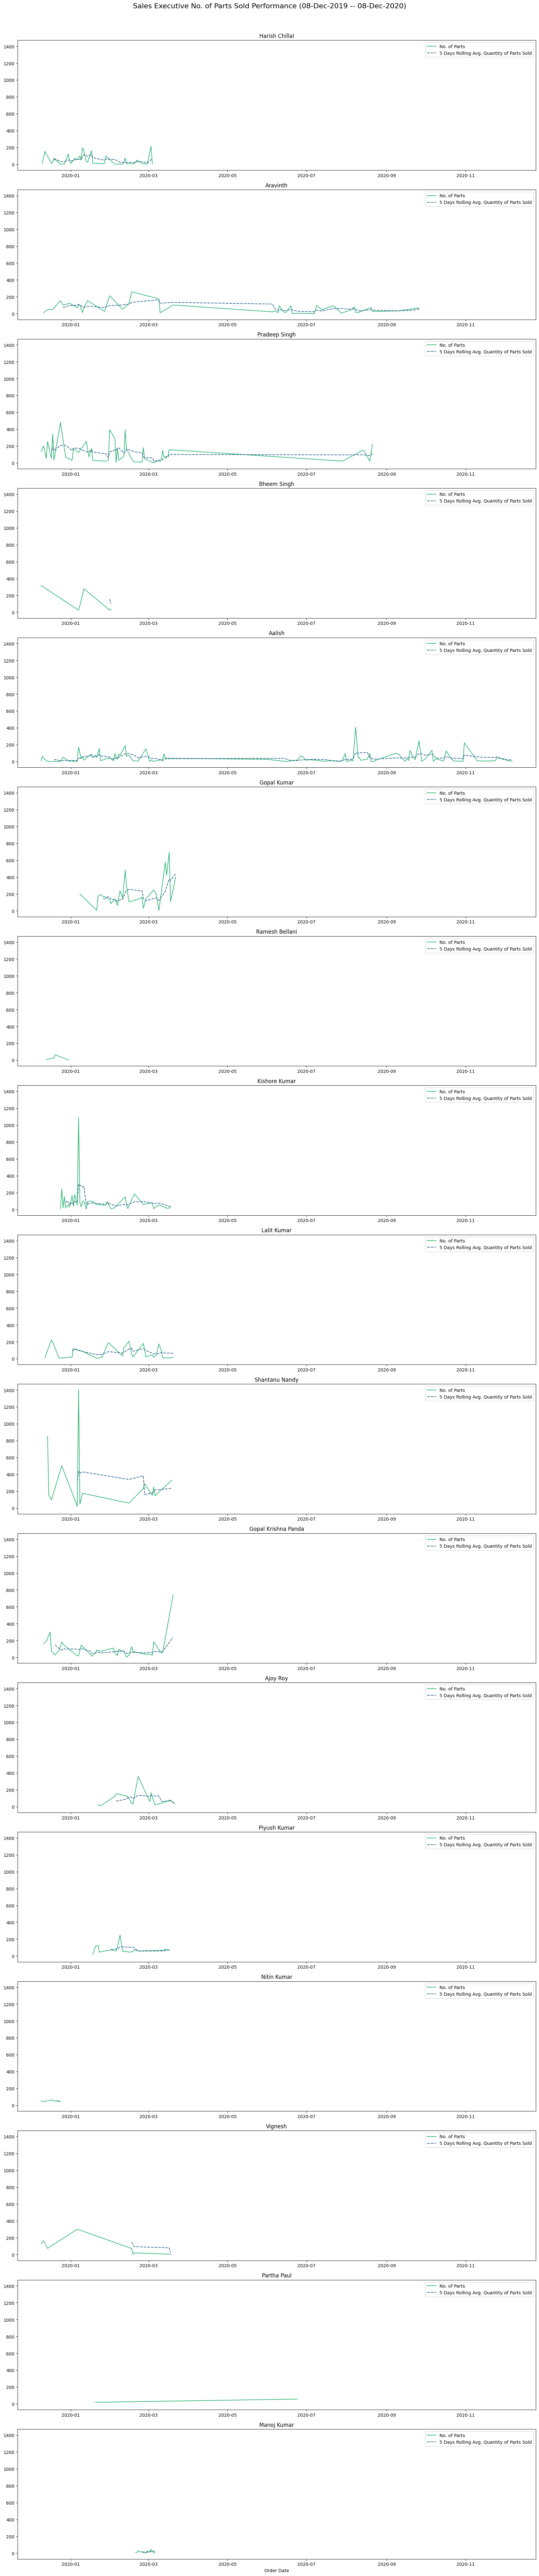

In [36]:
se_n_parts_perf(start_date='2019-12-08',
                 end_date='2020-12-08')

#`def()` Sales Executive No. of New Clients Signed Performance

In [37]:
# se_cust_sign = df.groupby('shop_name').first().reset_index()[['executive_name','shop_name']]
# se_cust_sign = se_cust_sign.groupby('executive_name').agg({'shop_name':'count'})

# Sales Executive TimeSeries Performance
def se_n_clients_perf(start_date, end_date):
  '''
  `start_date`: str %y-%m-%d
  `end_date`: str %y-%m-%d
  '''
 
  filt = (df["order_date"] >= pd.to_datetime(start_date)) & (df["order_date"] < pd.to_datetime(end_date))
  ndf = df[filt]
  ndf = ndf.groupby('shop_name').first().reset_index()

  executive_names = ndf['executive_name'].unique().tolist()
  fig, ax = plt.subplots(nrows=len(executive_names), ncols=1, figsize=(17, 80), dpi=100, sharex=True, sharey=True)  

  for ind, se_name in enumerate(executive_names):
    se_df = ndf[ndf['executive_name'] == se_name]
    se_df = se_df.groupby(ndf['order_date'].dt.date).agg({'shop_name':'count'})
    se_df['5_days_rolling_average_n_clients'] = se_df['shop_name'].rolling(5).mean()
    sns.lineplot(data=se_df[['shop_name', '5_days_rolling_average_n_clients']],
                palette='rocket_r',
                linewidth=1.5,
                ax=ax[ind])
    ax[ind].title.set_text(fmt_names.get(se_name))
    ax[ind].legend(['No. of Clients', '5 Days Rolling Avg. No. of Clients Signed'])
    ax[ind].tick_params(labelbottom=True)
  fig.tight_layout()
  plt.xlabel('Signing Date')
  fig.suptitle('Sales Executive No. of New Clients Signed Performance (08-Dec-2019 -- 08-Dec-2020)', size=16, y=1.01)
  fig.savefig('Sales Executive No. of New Clients Signed Performance (08-Dec-2019 -- 08-Dec-2020).jpg')
  plt.show()

# **Sales Executive No. of New Clients Signed Performance**

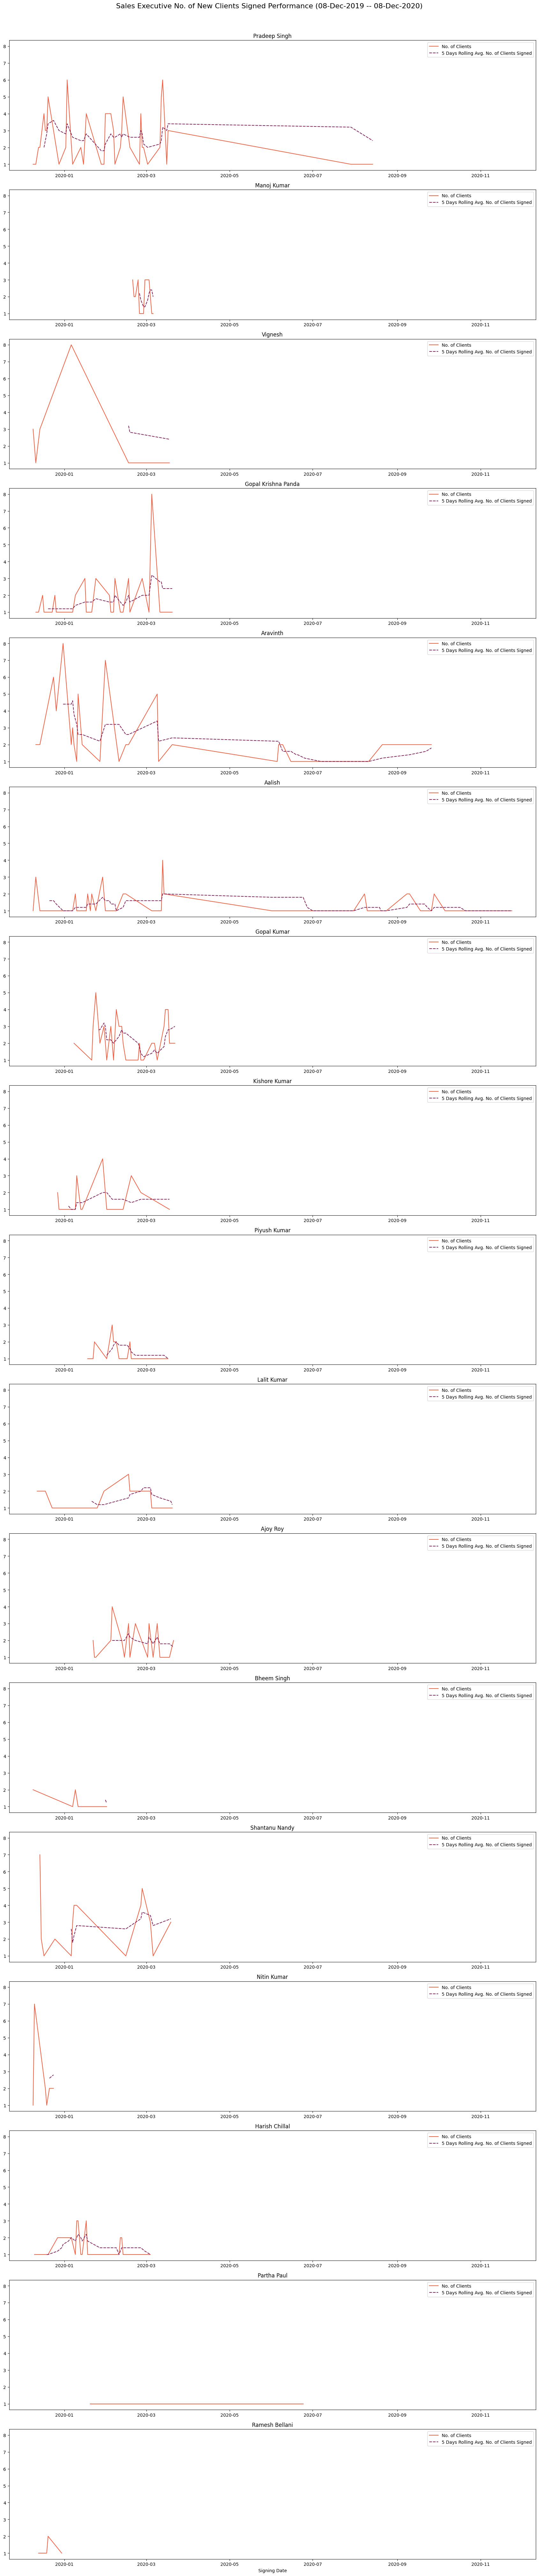

In [38]:
se_n_clients_perf(start_date='2019-12-08',
                  end_date='2020-12-08')

# **Customer Profile for Sales Executive(s)**

In [39]:
customer_profile = df.groupby(['executive_name', 'customer_type']).agg({'shop_name':'nunique'})

In [40]:
customer_profile = customer_profile.reset_index()

In [41]:
customer_profile[customer_profile['executive_name'] == 'aalish']

executive_name customer_type  shop_name
0         aalish   electrician          1
1         aalish      retailer        113

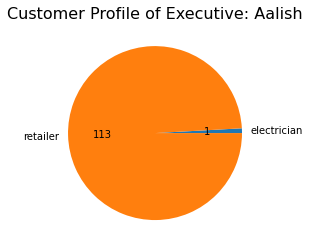

In [42]:
plt.pie(x=customer_profile[customer_profile['executive_name'] == 'aalish']['shop_name'],
        labels=customer_profile[customer_profile['executive_name'] == 'aalish'].customer_type,
        autopct=lambda x: '{:.0f}'.format(x*(customer_profile[customer_profile['executive_name'] == 'aalish']['shop_name']).sum()/100))

plt.title("Customer Profile of Executive: Aalish", fontsize=16);

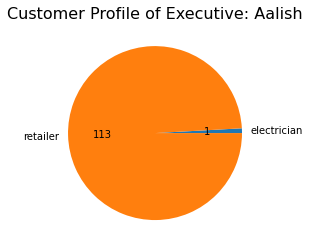

In [43]:
plt.pie(x=customer_profile[customer_profile['executive_name'] == 'aalish']['shop_name'],
        labels=customer_profile[customer_profile['executive_name'] == 'aalish'].customer_type,
        autopct=lambda x: '{:.0f}'.format(x*(customer_profile[customer_profile['executive_name'] == 'aalish']['shop_name']).sum()/100))

plt.title("Customer Profile of Executive: Aalish", fontsize=16);

# **Company Sales Performance**

In [44]:
start_date='2019-12-08'
end_date='2020-12-08'

## **Monthly Sales Trend**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


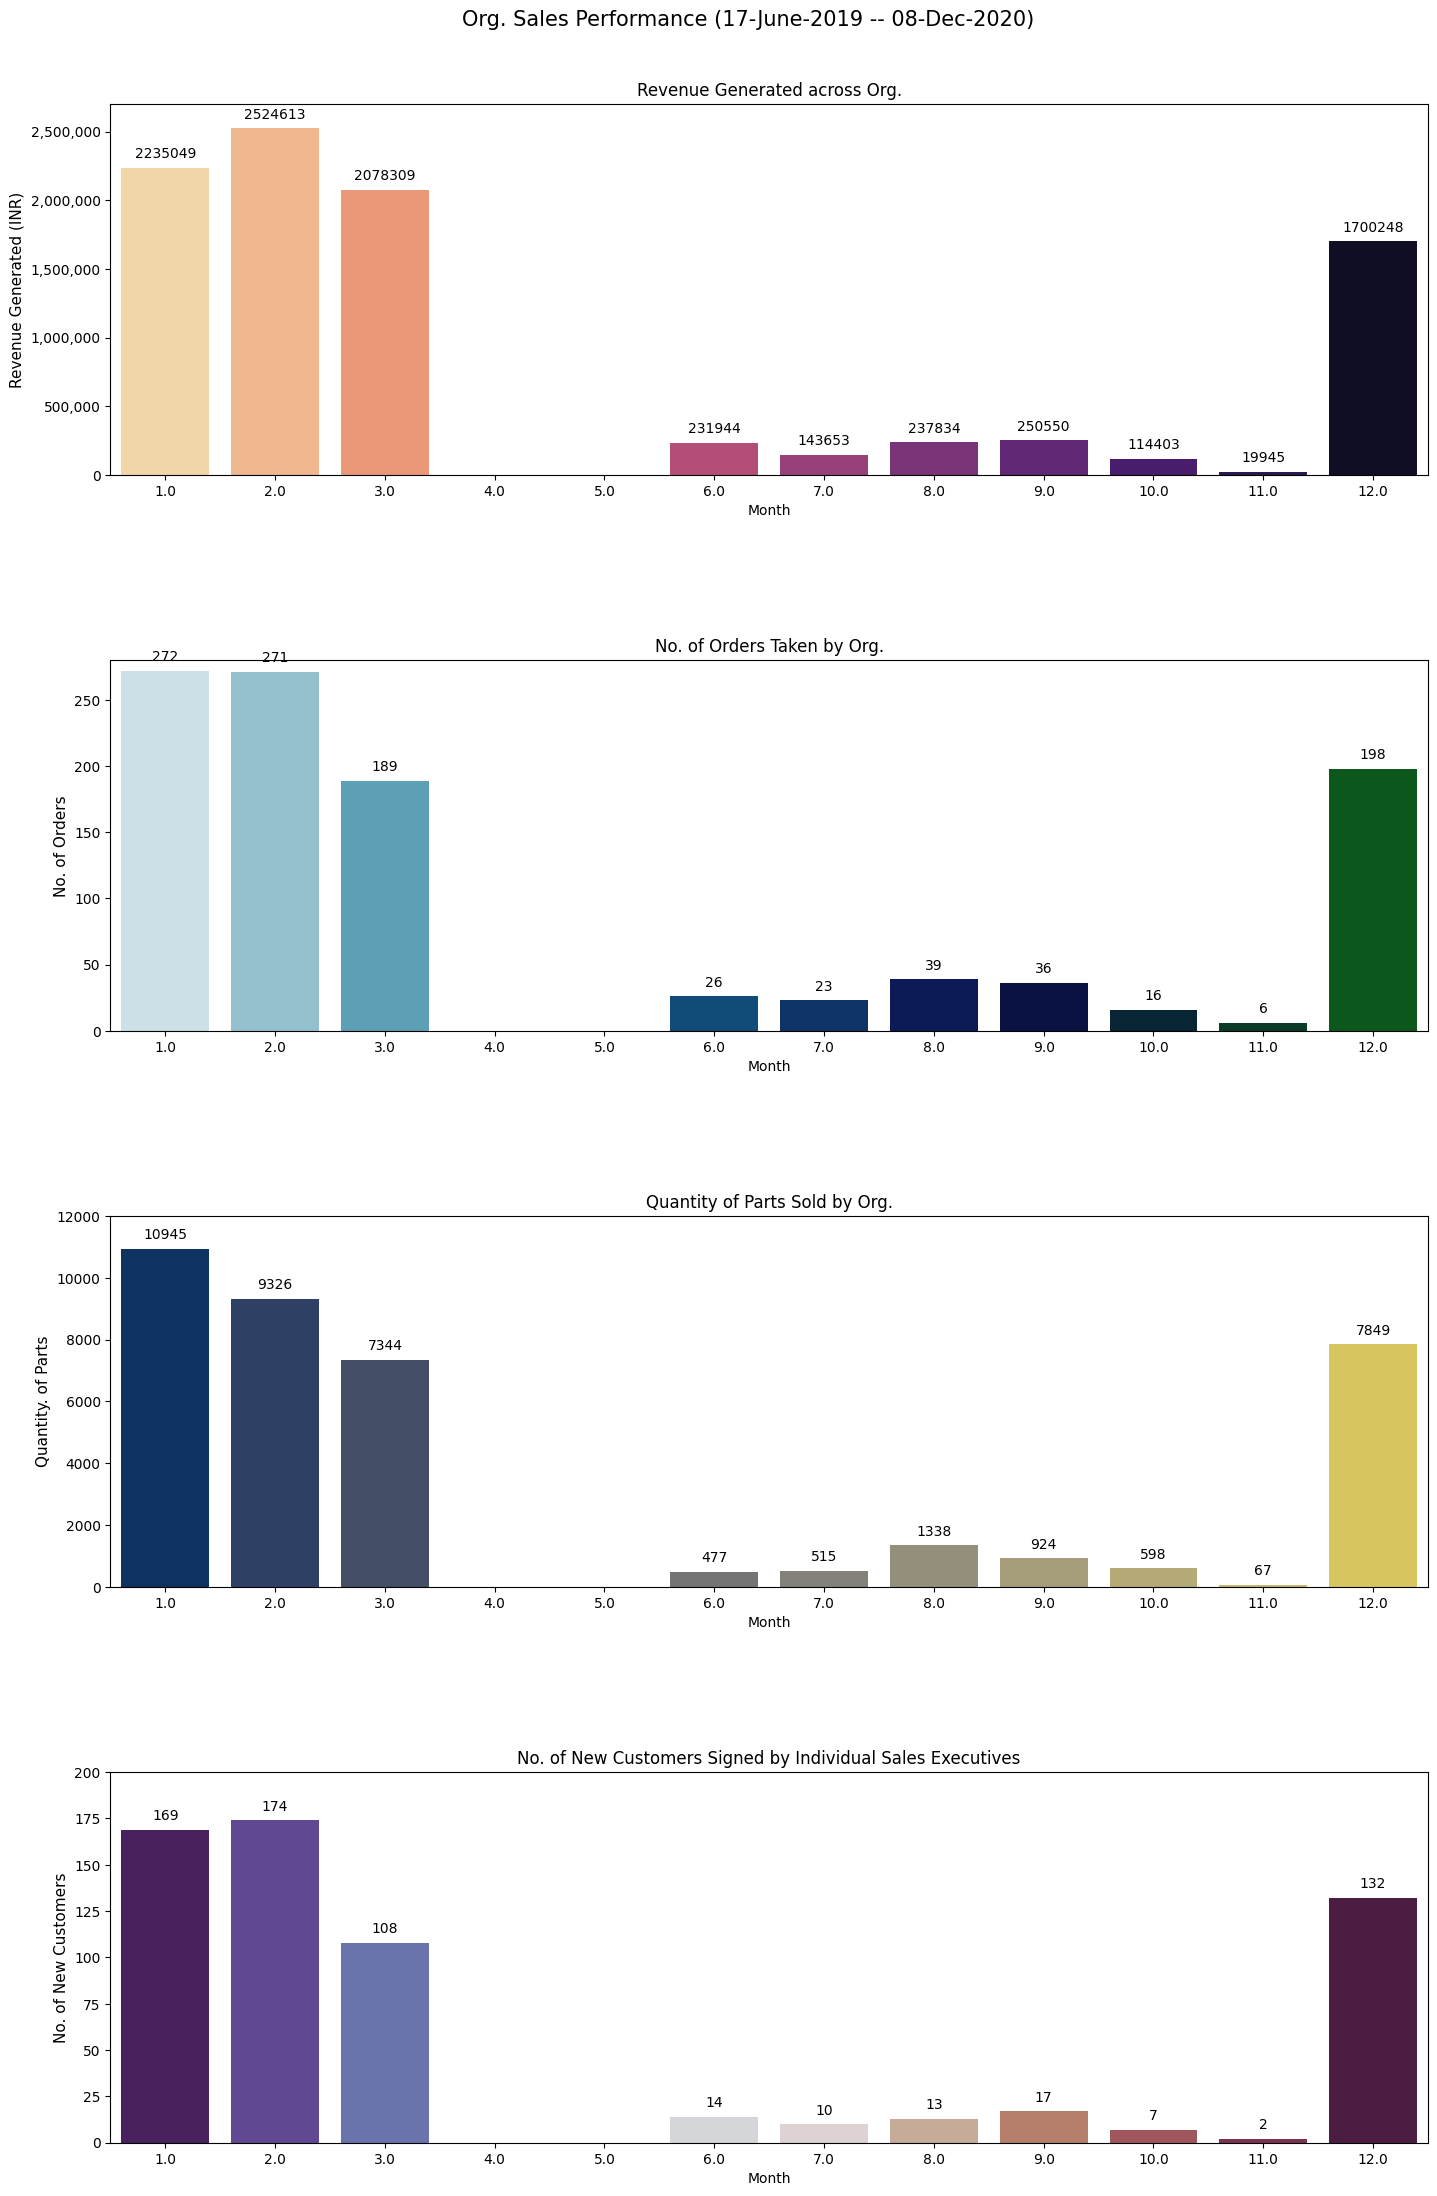

In [45]:
#@title **Monthly Sales Trend (08/Dec/2019 - 08/Dec/2020)**
# ax[0].ticklabel_format(style='plain', axis='y')
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(17, 27), dpi=100)  

filt = (df["order_date"] >= pd.to_datetime(start_date)) & (df["order_date"] < pd.to_datetime(end_date))
ndf = ndf[filt]

org_perf = ndf.groupby('month').agg({'total_price':'sum',
                                'quantity':'sum',
                                'order_id':'nunique'}).reset_index()

org_perf.loc[-1] = [4, np.nan, np.nan, np.nan]  # adding a row
org_perf.index = org_perf.index + 1  # shifting index
org_perf = org_perf.sort_index()  # sorting by index

org_perf.loc[-1] = [5, np.nan, np.nan, np.nan]  # adding a row
org_perf.index = org_perf.index + 1  # shifting index
org_perf = org_perf.sort_index()  # sorting by index

org_perf.loc[-1] = [11, np.nan, np.nan, np.nan]  # adding a row
org_perf.index = org_perf.index + 1  # shifting index
org_perf = org_perf.sort_index()  # sorting by index

org_cust_sign = ndf.groupby('shop_name').first().reset_index()[['order_date','month','shop_name']]
org_cust_sign = org_cust_sign.groupby('month').agg({'shop_name':'count'}).reset_index()

org_cust_sign.loc[-1] = [4, np.nan]  # adding a row
org_cust_sign.index = org_cust_sign.index + 1  # shifting index
org_cust_sign = org_cust_sign.sort_index()  # sorting by index

org_cust_sign.loc[-1] = [5, np.nan]  # adding a row
org_cust_sign.index = org_cust_sign.index + 1  # shifting index
org_cust_sign = org_cust_sign.sort_index()  # sorting by index

org_cust_sign.loc[-1] = [11, np.nan]  # adding a row
org_cust_sign.index = org_cust_sign.index + 1  # shifting index
org_cust_sign = org_cust_sign.sort_index()  # sorting by index


# REVENUE
sns.barplot(data=org_perf,
            x='month',
            y='total_price',
            palette='magma_r',
            ax=ax[0])

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Revenue Generated (INR)', size=11)
ax[0].set_ylim(0, 2700000)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].title.set_text('Revenue Generated across Org.')  
add_value_labels_int(ax[0])  

# NUMBER OF ORDERS
sns.barplot(data=org_perf,
            x='month',
            y='order_id',
            palette='ocean_r',
            ax=ax[1])

ax[1].set_xlabel('Month')
ax[1].set_ylabel('No. of Orders', size=11)
ax[1].set_ylim(0, 280)
ax[1].title.set_text('No. of Orders Taken by Org.')  
add_value_labels_int(ax[1])  

# NO OF PARTS (QUANTITY)
sns.barplot(data=org_perf,
            x='month',
            y='quantity',
            palette='cividis',
            ax=ax[2])

ax[2].set_xlabel('Month')
ax[2].set_ylabel('Quantity. of Parts', size=11)
ax[2].set_ylim(0, 12000)
ax[2].title.set_text('Quantity of Parts Sold by Org.')  
add_value_labels_int(ax[2]) 

# NEW CUSTOMERS SIGNED
sns.barplot(data=org_cust_sign,
            x='month',
            y='shop_name',
            palette='twilight_shifted',
            ax=ax[3])

ax[3].set_xlabel('Month')
ax[3].set_ylabel('No. of New Customers', size=11)
ax[3].set_ylim(0, 200)
ax[3].title.set_text('No. of New Customers Signed by Individual Sales Executives')  
add_value_labels_int(ax[3]) 

fig.suptitle('Org. Sales Performance (17-June-2019 -- 08-Dec-2020)', fontsize=15, y=0.915)
plt.subplots_adjust(hspace=0.5)
fig.savefig('Org. Sales Performance (17-June-2019 -- 08-Dec-2020).jpg')
plt.show()

# **Sales Trend**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


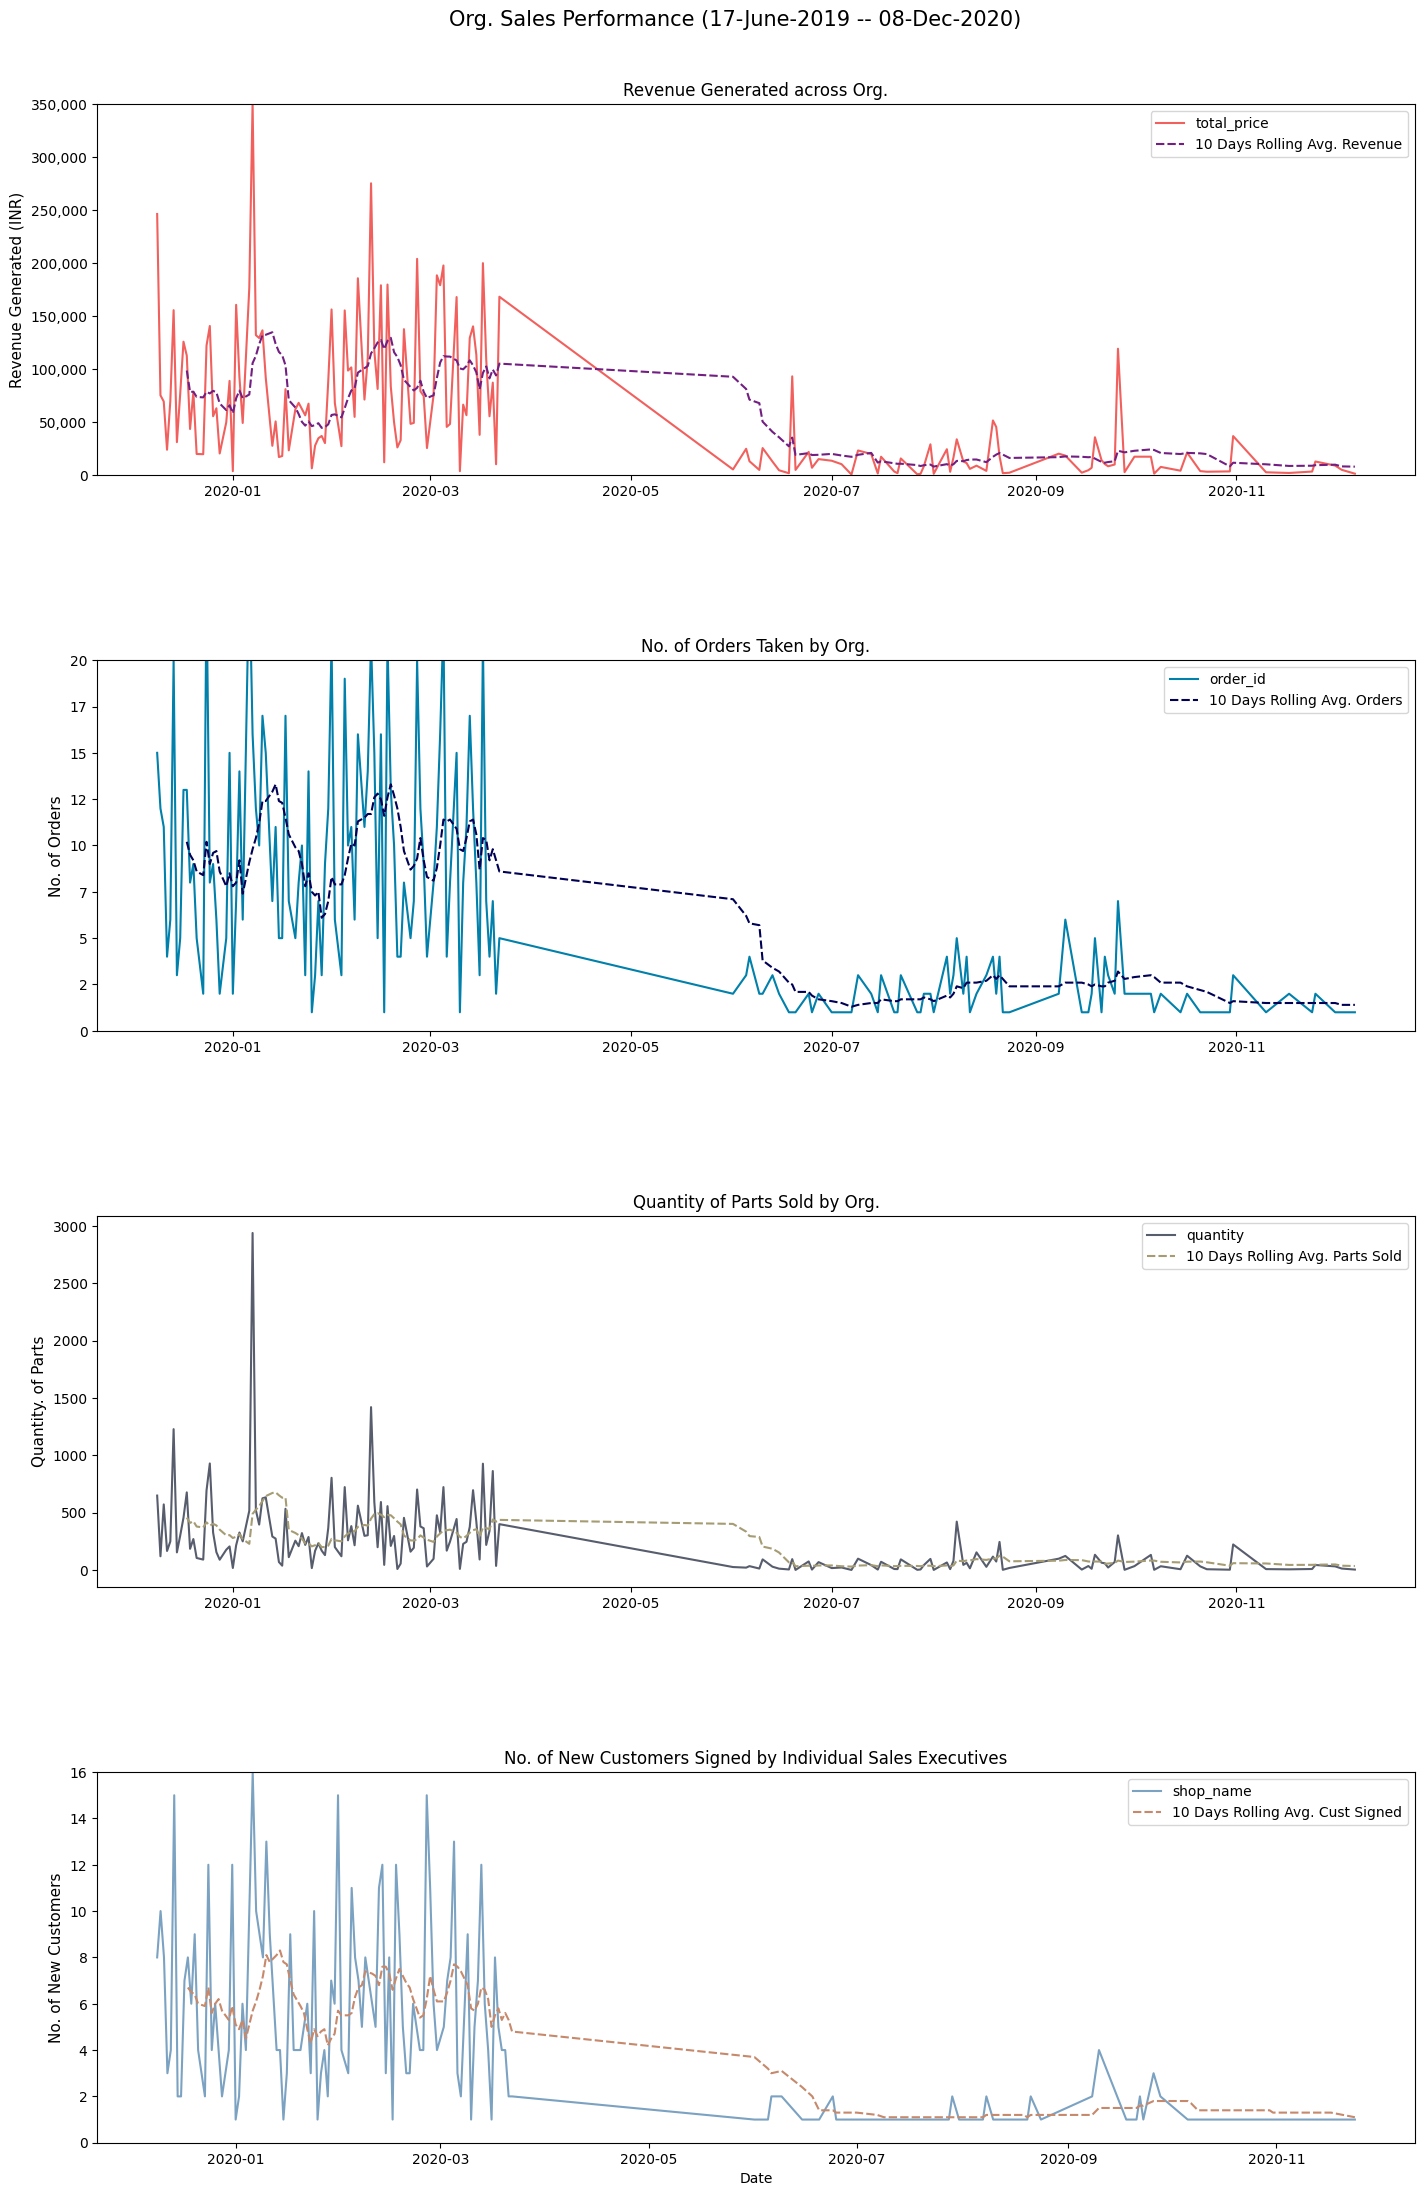

In [46]:
#@title **Sales Trend (08/Dec/2019 - 08/Dec/2020)**
## **Monthly Sales Trend (08/Dec/2019 - 08/Dec/2020)**
# ax[0].ticklabel_format(style='plain', axis='y') # scientific
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(17, 27), dpi=100)  

filt = (df["order_date"] >= pd.to_datetime(start_date)) & (df["order_date"] < pd.to_datetime(end_date))
ndf = ndf[filt]

org_perf = ndf.groupby('order_date').agg({'total_price':'sum',
                                    'quantity':'sum',
                                    'order_id':'nunique'}).reset_index()

org_perf['10 Days Rolling Avg. Revenue'] = org_perf['total_price'].rolling(10).mean()
org_perf = org_perf.set_index(keys = 'order_date')

org_cust_sign = ndf.groupby('shop_name').first().reset_index()[['order_date','month','shop_name']]
org_cust_sign = org_cust_sign.groupby('order_date').agg({'shop_name':'count'}).reset_index()


# REVENUE
sns.lineplot(data=org_perf[['total_price', '10 Days Rolling Avg. Revenue']],
             linewidth=1.5,
             palette='magma_r',
             ax=ax[0])

sns.lineplot()

ax[0].set_xlabel('')
ax[0].set_ylabel('Revenue Generated (INR)', size=11)
ax[0].set_ylim(0, 350000)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].title.set_text('Revenue Generated across Org.')  

org_perf['10 Days Rolling Avg. Orders'] = org_perf['order_id'].rolling(10).mean()

# NUMBER OF ORDERS
sns.lineplot(data=org_perf[['order_id', '10 Days Rolling Avg. Orders']],
             linewidth=1.5,
             palette='ocean_r',
             ax=ax[1])

ax[1].set_xlabel('')
ax[1].set_ylabel('No. of Orders', size=11)
ax[1].set_ylim(0, 20)
ax[1].title.set_text('No. of Orders Taken by Org.')  
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))

org_perf['10 Days Rolling Avg. Parts Sold'] = org_perf['quantity'].rolling(10).mean()

# NO OF PARTS (QUANTITY)
sns.lineplot(data=org_perf[['quantity', '10 Days Rolling Avg. Parts Sold']],
            palette='cividis',
            ax=ax[2])

ax[2].set_xlabel('')
ax[2].set_ylabel('Quantity. of Parts', size=11)
# ax[2].set_ylim(0, 10000)
ax[2].title.set_text('Quantity of Parts Sold by Org.')  
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))


org_cust_sign['10 Days Rolling Avg. Cust Signed'] = org_cust_sign['shop_name'].rolling(10).mean()
org_cust_sign = org_cust_sign.set_index('order_date')
# NEW CUSTOMERS SIGNED
sns.lineplot(data=org_cust_sign[['shop_name', '10 Days Rolling Avg. Cust Signed']],
            palette='twilight_shifted',
            ax=ax[3])

ax[3].set_xlabel('Date')
ax[3].set_ylabel('No. of New Customers', size=11)
ax[3].set_ylim(0, 16)
ax[3].title.set_text('No. of New Customers Signed by Individual Sales Executives')  
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))

fig.suptitle('Org. Sales Performance (17-June-2019 -- 08-Dec-2020)', fontsize=15, y=0.915)
plt.subplots_adjust(hspace=0.5)
fig.savefig('Org. Sales Performance (17-June-2019 -- 08-Dec-2020).jpg')
plt.show()

# **Month-wise Comparison (2019-09 vs. 2020-09)**

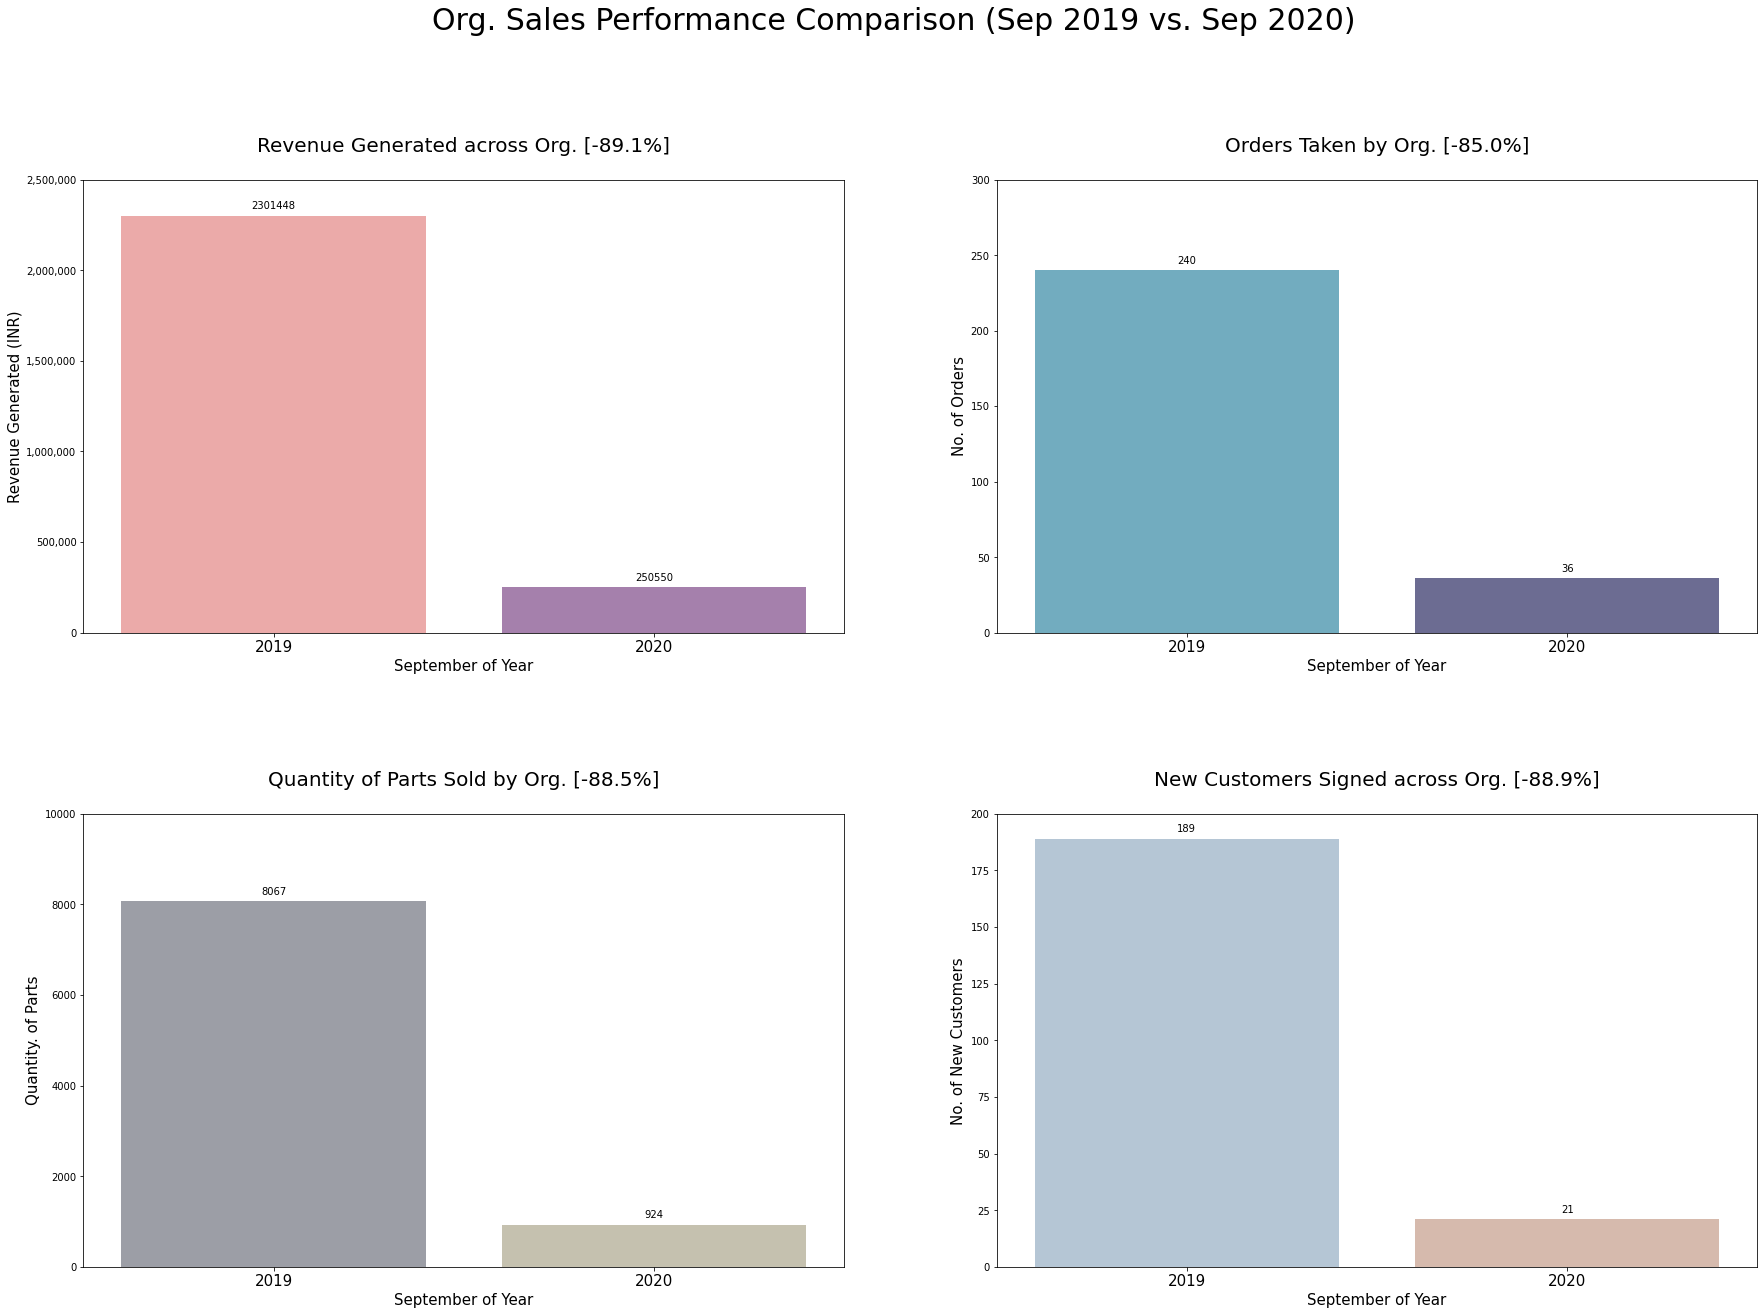

In [47]:
#@title **Month-wise Comparison (2019-09 vs. 2020-09)**
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))  

filt = ((df["order_date"] >= pd.to_datetime('2019-09-01')) & (df["order_date"] < pd.to_datetime('2019-10-01'))) + ((df["order_date"] >= pd.to_datetime('2020-09-01')) & (df["order_date"] < pd.to_datetime('2020-10-01')))
ndf = df[filt].sort_values(by='order_date')

org_perf = ndf.groupby('year_month').agg({'total_price':'sum',
                                          'quantity':'sum',
                                          'order_id':'nunique'}).reset_index()
org_perf_change = org_perf.pct_change()

org_cust_sign = ndf.groupby('shop_name').first().reset_index()[['order_date','year_month','shop_name']]
org_cust_sign = org_cust_sign.groupby('year_month').agg({'shop_name':'count'}).reset_index()

org_cust_sign_change = org_cust_sign.pct_change()

# REVENUE
sns.barplot(data=org_perf,
            x='year_month',
            y='total_price',
            palette='magma_r',
            ax=ax[0,0],
            alpha=0.6)

ax[0,0].set_xticklabels([2019, 2020], size=15)
ax[0,0].set_xlabel('September of Year', size=15)
ax[0,0].set_ylabel('Revenue Generated (INR)', size=15)
ax[0,0].set_ylim(0, 2500000)
ax[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0,0].set_title(f'Revenue Generated across Org. [{(org_perf_change.loc[1, "total_price"]*100):.1f}%]\n', size=20)  
add_value_labels_int(ax[0,0])  

# NUMBER OF ORDERS
sns.barplot(data=org_perf,
            x='year_month',
            y='order_id',
            palette='ocean_r',
            ax=ax[0,1],
            alpha=0.6)

ax[0,1].set_xticklabels([2019, 2020], size=15)
ax[0,1].set_xlabel('September of Year', size=15)
ax[0,1].set_ylabel('No. of Orders', size=15)
ax[0,1].set_ylim(0, 300)
ax[0,1].set_title(f'Orders Taken by Org. [{(org_perf_change.loc[1, "order_id"]*100):.1f}%]\n', size=20)
add_value_labels_int(ax[0,1])  

# NO OF PARTS (QUANTITY)
sns.barplot(data=org_perf,
            x='year_month',
            y='quantity',
            palette='cividis',
            ax=ax[1,0],
            alpha=0.6)

ax[1,0].set_xticklabels([2019, 2020], size=15)
ax[1,0].set_xlabel('September of Year', size=15)
ax[1,0].set_ylabel('Quantity. of Parts', size=15)
ax[1,0].set_ylim(0, 10000)
ax[1,0].set_title(f'Quantity of Parts Sold by Org. [{(org_perf_change.loc[1, "quantity"]*100):.1f}%]\n', size=20)  
add_value_labels_int(ax[1,0]) 

# NEW CUSTOMERS SIGNED
sns.barplot(data=org_cust_sign,
            x='year_month',
            y='shop_name',
            palette='twilight_shifted',
            ax=ax[1,1],
            alpha=0.6)

ax[1,1].set_xticklabels([2019, 2020], size=15)
ax[1,1].set_xlabel('September of Year', size=15)
ax[1,1].set_ylabel('No. of New Customers', size=15)
ax[1,1].set_ylim(0, 200)
ax[1,1].set_title(f'New Customers Signed across Org. [{(org_cust_sign_change.loc[1, "shop_name"]*100):.1f}%]\n', size=20)  
add_value_labels_int(ax[1,1]) 

fig.suptitle('Org. Sales Performance Comparison (Sep 2019 vs. Sep 2020)', fontsize=30, y=1)
plt.subplots_adjust(hspace=0.4)
fig.savefig('Org. Sales Performance Comparison (Sep 2019 vs. Sep 2020).jpg')
plt.show()

# **Weekday Sales Trends**

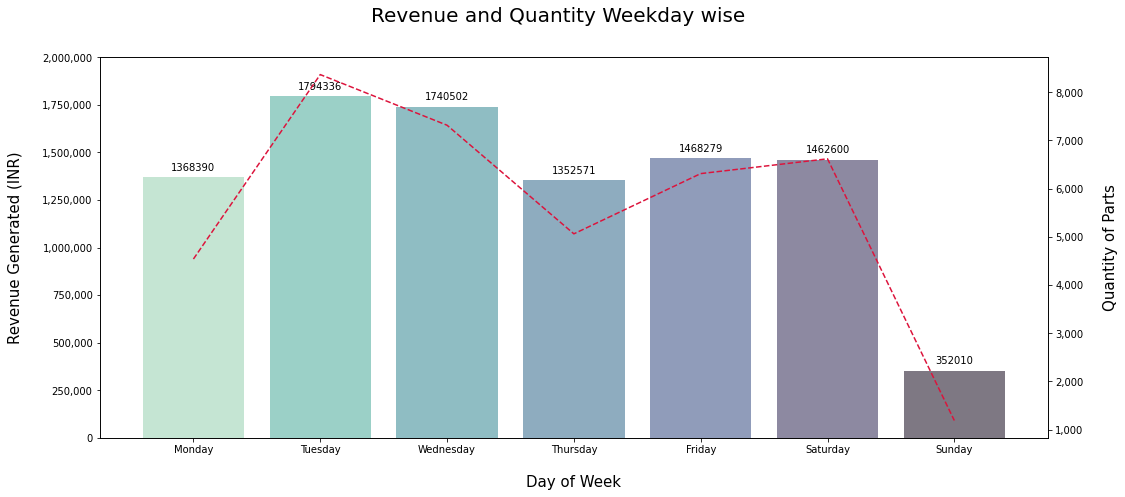

In [48]:
#@title **Revenue and Quantity Weekday wise(08/Dec/2019 - 08/Dec/2020)**
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17, 7))  

filt = (df["order_date"] >= pd.to_datetime('2019-12-08')) & (df["order_date"] <= pd.to_datetime('2020-12-08'))
ndf = df[filt]
org_day_perf = ndf.groupby(ndf['order_date'].dt.weekday).agg({'total_price':'sum',
                                                              'quantity':'sum'})

sns.barplot(x=org_day_perf.index,
            y=org_day_perf['total_price'],
            palette='mako_r',
            ax=ax,
            alpha=0.6)

ax.set_xlabel('Day of Week', size=15, labelpad=20)
ax.set_ylabel('Revenue Generated (INR)', size=15, labelpad=20)
ax.set_ylim(0, 2000000)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=10)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
add_value_labels_int(ax)

ax2 = ax.twinx()

sns.lineplot(x=org_day_perf.index,
             y=org_day_perf['quantity'],
             color='crimson',
             linestyle='--',
             ax=ax2)

ax2.set_ylabel('Quantity of Parts', size=15, labelpad=20)
ax2.ticklabel_format(style='plain', axis='y')
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.suptitle('Revenue and Quantity Weekday wise', size=20)
fig.subplots_adjust(hspace=1)
fig.savefig('Revenue and Quantity Weekday wise (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show()

# **Day of Month Sales Trend** 

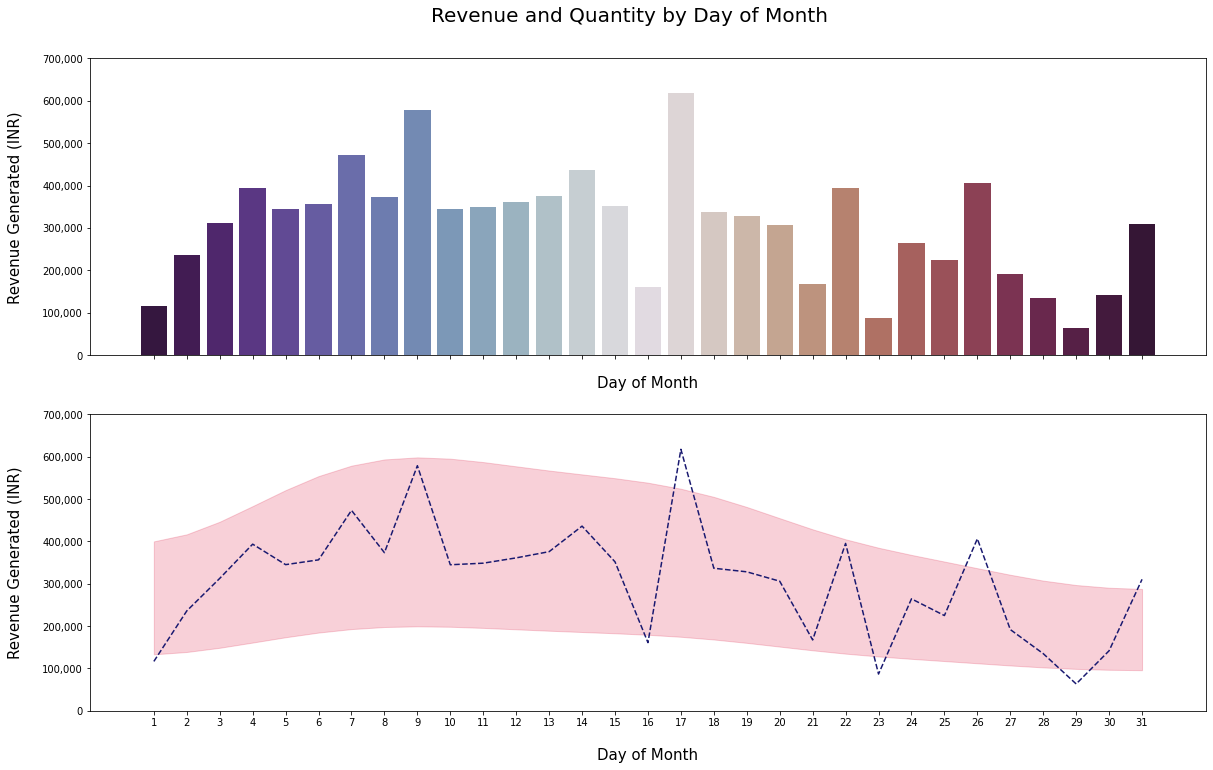

In [49]:
#@title **Revenue and Quantity Weekday wise(08/Dec/2019 - 08/Dec/2020)**
from scipy.ndimage.filters import gaussian_filter1d

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), sharex=True)  

filt = (df["order_date"] >= pd.to_datetime('2019-12-08')) & (df["order_date"] <= pd.to_datetime('2020-12-08'))
ndf = df[filt]
org_day_perf = ndf.groupby(ndf['order_date'].dt.day).agg({'total_price':'sum',
                                                          'quantity':'sum'})
org_day_perf['10 Days Rolling Average'] = org_day_perf['total_price'].rolling(5).mean()

sns.barplot(x=org_day_perf.index,
            y=org_day_perf['total_price'],
            palette='twilight_shifted',
            ax=ax[0])

ax[0].set_xlabel('Day of Month', size=15,  labelpad=20)
ax[0].set_ylabel('Revenue Generated (INR)', size=15, labelpad=20)
ax[0].set_ylim(0, 700000)
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

org_day_perf = org_day_perf.reset_index()

err = (1 - org_day_perf['total_price']) / 2
upper = gaussian_filter1d(org_day_perf['total_price'] + err, sigma=3)
lower = gaussian_filter1d(org_day_perf['total_price'] - err, sigma=3)

ax[1].plot(org_day_perf.index, org_day_perf['total_price'], color='midnightblue', linestyle='--')
ax[1].fill_between(org_day_perf.index, upper, lower, color='crimson', alpha=0.2)

ax[1].set_xlabel('Day of Month', size=15,  labelpad=20)
ax[1].set_ylabel('Revenue Generated (INR)', size=15, labelpad=20)
ax[1].set_ylim(0, 700000)
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.suptitle('Revenue and Quantity by Day of Month', size=20, y=0.94)
fig.savefig('Revenue and Quantity by Day of Month (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show()

# **Quarterly Revenue Performance (2020)**

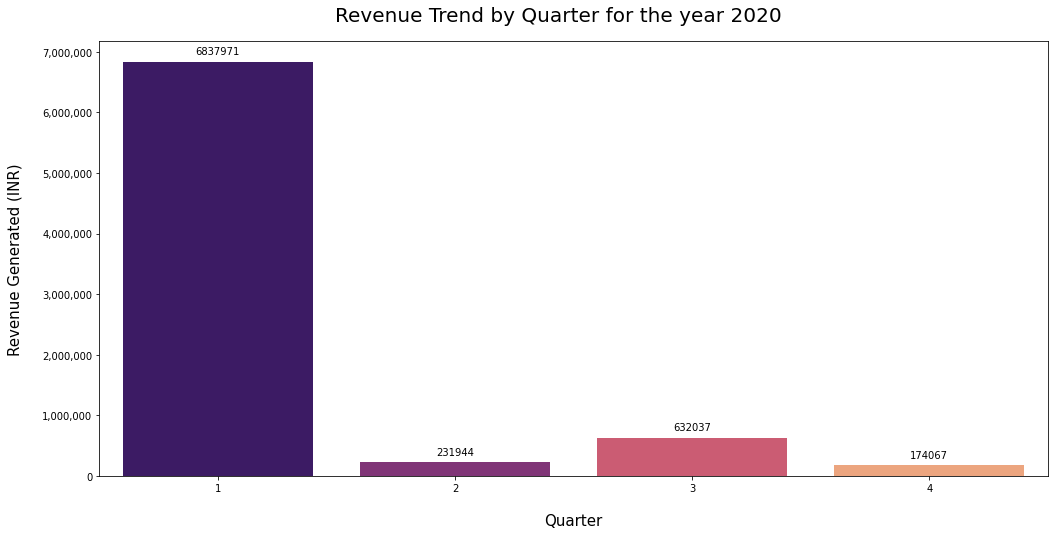

In [50]:
#@title **Revenue and Quantity Quarterly Performance for the Year 2020**
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17, 8))  

filt = (df["order_date"] >= pd.to_datetime('2020-01-01')) & (df["order_date"] <= pd.to_datetime('2020-12-31'))
ndf = df[filt]
org_quart_perf = ndf.groupby(ndf['order_date'].dt.quarter).agg({'total_price':'sum',
                                                          'quantity':'sum'})

sns.barplot(x=org_quart_perf.index,
            y=org_quart_perf['total_price'],
            palette='magma',
            ax=ax)

ax.set_xlabel('Quarter', size=15,  labelpad=20)
ax.set_ylabel('Revenue Generated (INR)', size=15, labelpad=20)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
add_value_labels_int(ax)


fig.suptitle('Revenue Trend by Quarter for the year 2020', size=20, y=0.94)
fig.savefig('Revenue Trend by Quarter for the year 2020.jpg')
plt.show()

# All Time Sales Trend

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


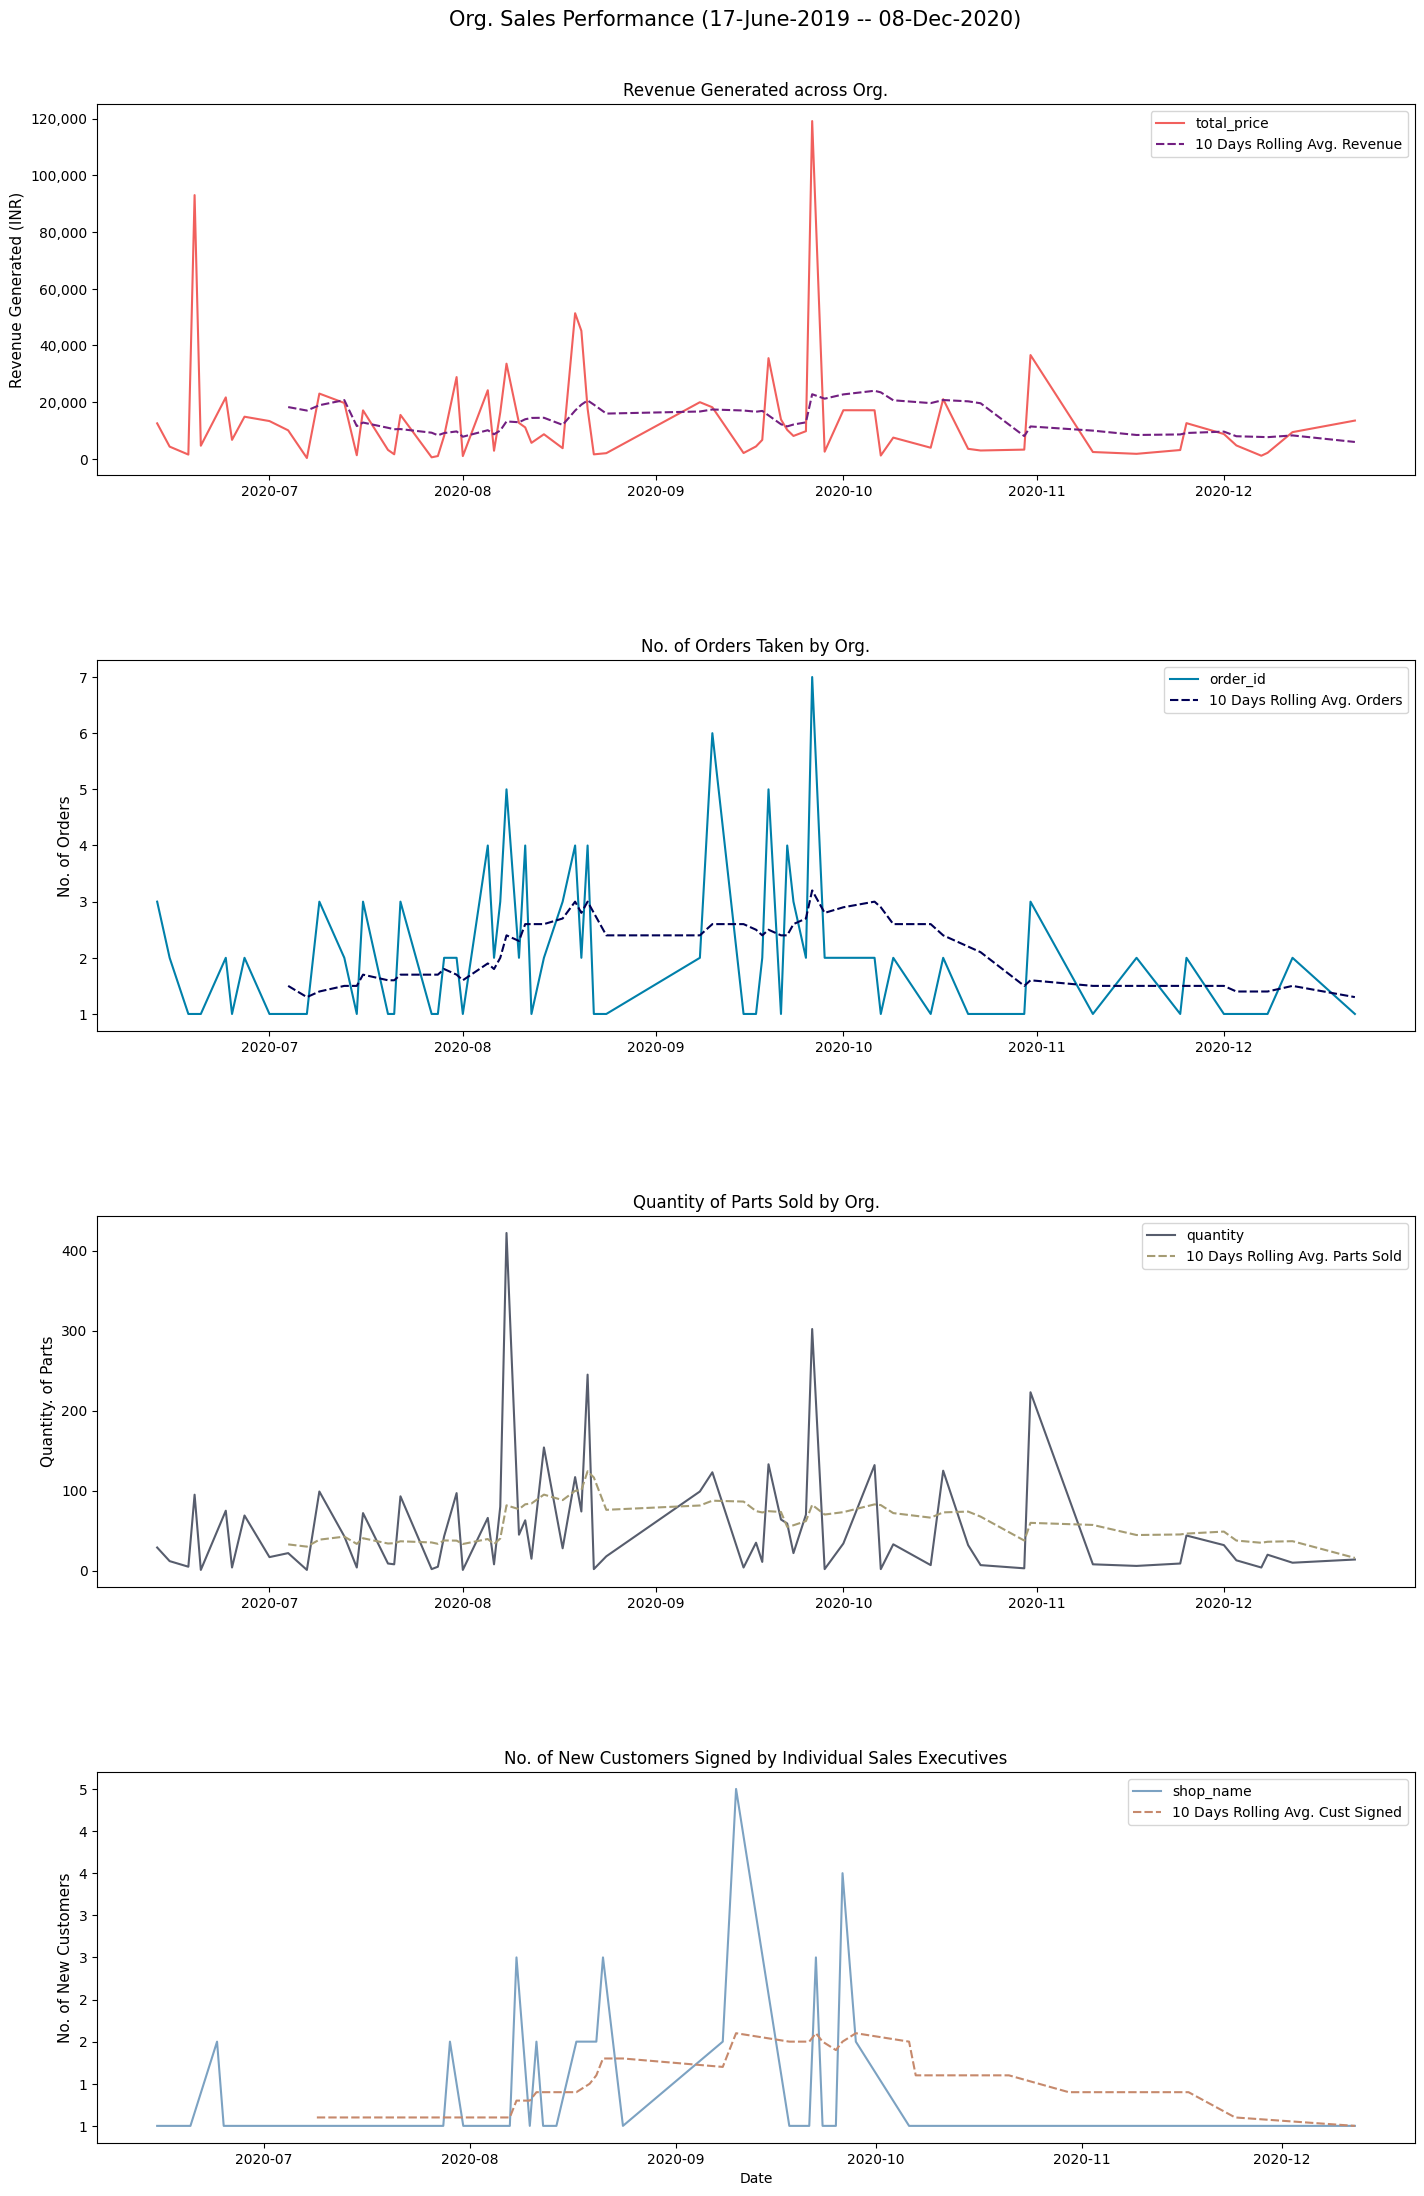

In [51]:
#@title **Sales Trend (Max)**
## **Monthly Sales Trend (08/Dec/2019 - 08/Dec/2020)**
# ax[0].ticklabel_format(style='plain', axis='y') # scientific
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(17, 27), dpi=100)  

filt = (df["order_date"] >= pd.to_datetime('2020-06-13')) & (df["order_date"] < pd.to_datetime('2021-01-04'))
ndf = ndf[filt]

org_perf = ndf.groupby('order_date').agg({'total_price':'sum',
                                    'quantity':'sum',
                                    'order_id':'nunique'}).reset_index()

org_perf['10 Days Rolling Avg. Revenue'] = org_perf['total_price'].rolling(10).mean()
org_perf = org_perf.set_index(keys = 'order_date')

org_cust_sign = ndf.groupby('shop_name').first().reset_index()[['order_date','month','shop_name']]
org_cust_sign = org_cust_sign.groupby('order_date').agg({'shop_name':'count'}).reset_index()


# REVENUE
sns.lineplot(data=org_perf[['total_price', '10 Days Rolling Avg. Revenue']],
             linewidth=1.5,
             palette='magma_r',
             ax=ax[0])

sns.lineplot()

ax[0].set_xlabel('')
ax[0].set_ylabel('Revenue Generated (INR)', size=11)
# ax[0].set_ylim(0, 350000)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].title.set_text('Revenue Generated across Org.')  

org_perf['10 Days Rolling Avg. Orders'] = org_perf['order_id'].rolling(10).mean()

# NUMBER OF ORDERS
sns.lineplot(data=org_perf[['order_id', '10 Days Rolling Avg. Orders']],
             linewidth=1.5,
             palette='ocean_r',
             ax=ax[1])

ax[1].set_xlabel('')
ax[1].set_ylabel('No. of Orders', size=11)
# ax[1].set_ylim(0, 20)
ax[1].title.set_text('No. of Orders Taken by Org.')  
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))

org_perf['10 Days Rolling Avg. Parts Sold'] = org_perf['quantity'].rolling(10).mean()

# NO OF PARTS (QUANTITY)
sns.lineplot(data=org_perf[['quantity', '10 Days Rolling Avg. Parts Sold']],
            palette='cividis',
            ax=ax[2])

ax[2].set_xlabel('')
ax[2].set_ylabel('Quantity. of Parts', size=11)
# ax[2].set_ylim(0, 10000)
ax[2].title.set_text('Quantity of Parts Sold by Org.')  
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))


org_cust_sign['10 Days Rolling Avg. Cust Signed'] = org_cust_sign['shop_name'].rolling(10).mean()
org_cust_sign = org_cust_sign.set_index('order_date')
# NEW CUSTOMERS SIGNED
sns.lineplot(data=org_cust_sign[['shop_name', '10 Days Rolling Avg. Cust Signed']],
            palette='twilight_shifted',
            ax=ax[3])

ax[3].set_xlabel('Date')
ax[3].set_ylabel('No. of New Customers', size=11)
# ax[3].set_ylim(0, 16)
ax[3].title.set_text('No. of New Customers Signed by Individual Sales Executives')  
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))

fig.suptitle('Org. Sales Performance (17-June-2019 -- 08-Dec-2020)', fontsize=15, y=0.915)
plt.subplots_adjust(hspace=0.5)
fig.savefig('Org. Sales Performance (17-June-2019 -- 08-Dec-2020).jpg')
plt.show()

# Product Performance  

* Top 5 Products (Daterange)  
  * Range, Part No
* Top 5 Segments (Daterange)  
* Top 3 Segments for Entire Year
* Segment Trends (overlapping)  


In [52]:
df.part_no.nunique(), df.part_name.nunique()

(1121, 100)

In [53]:
df.shape

(12755, 18)

In [54]:
df.head()

order_id order_date  day day_of_week  month  year  year_month  quarter  \
0  CP0001584 2019-12-31   31     Tuesday     12  2019      201912        4   
1  CP0001584 2019-12-31   31     Tuesday     12  2019      201912        4   
2  CP0001584 2019-12-31   31     Tuesday     12  2019      201912        4   
3  CP0001586 2019-12-31   31     Tuesday     12  2019      201912        4   
4  CP0001588 2019-12-31   31     Tuesday     12  2019      201912        4   

  customer_type                         shop_name executive_name  \
0      retailer     shribeeralingeswarautomobiles  harishchillal   
1      retailer     shribeeralingeswarautomobiles  harishchillal   
2      retailer     shribeeralingeswarautomobiles  harishchillal   
3      retailer   tamilnaduautomobiles-dharmapuri       aravinth   
4      retailer  jayalakshmiautowings-dharamapuri       aravinth   

  distributor_name   part_no               part_name segment  quantity  \
0  omegaautomotive  PEAD3280         Pressure Switch     4WH         5   
1  omegaautomotive  PEAD3512       Stop Light Switch     4WH         4   
2  omegaautomotive  PEAD6409  Wind Shield Washer Kit     4WH        10   
3              tvs  PEAD6413  Wind Shield Washer Kit     4WH         1   
4              tvs  PEAD3932         Pressure Switch     4WH         3   

   unit_price  total_price  
0         187          935  
1          84          336  
2         344         3440  
3         995          995  
4         236          708

In [55]:
p_map_df = df.groupby('part_name').agg({'part_no':'unique'}).reset_index()

In [56]:
p_map = dict(zip(p_map_df.part_name, p_map_df.part_no))

In [57]:
p_map.get("4ST Switch")

array(['PEAD2203', 'PEAD2204'], dtype=object)

In [58]:
df.groupby('part_name').agg({'quantity':'count'}).sort_values('quantity', ascending=False).head().rename({'quantity':'count'})

quantity
part_name                               
Tank Units/ Fuel Level Sensors      1762
Relays                              1283
Instrument Cluster                  1002
Speed Sensor                         898
Horn                                 611

In [59]:
df['order_date'].min(), df['order_date'].max()

(Timestamp('2019-06-13 00:00:00'), Timestamp('2021-01-04 00:00:00'))

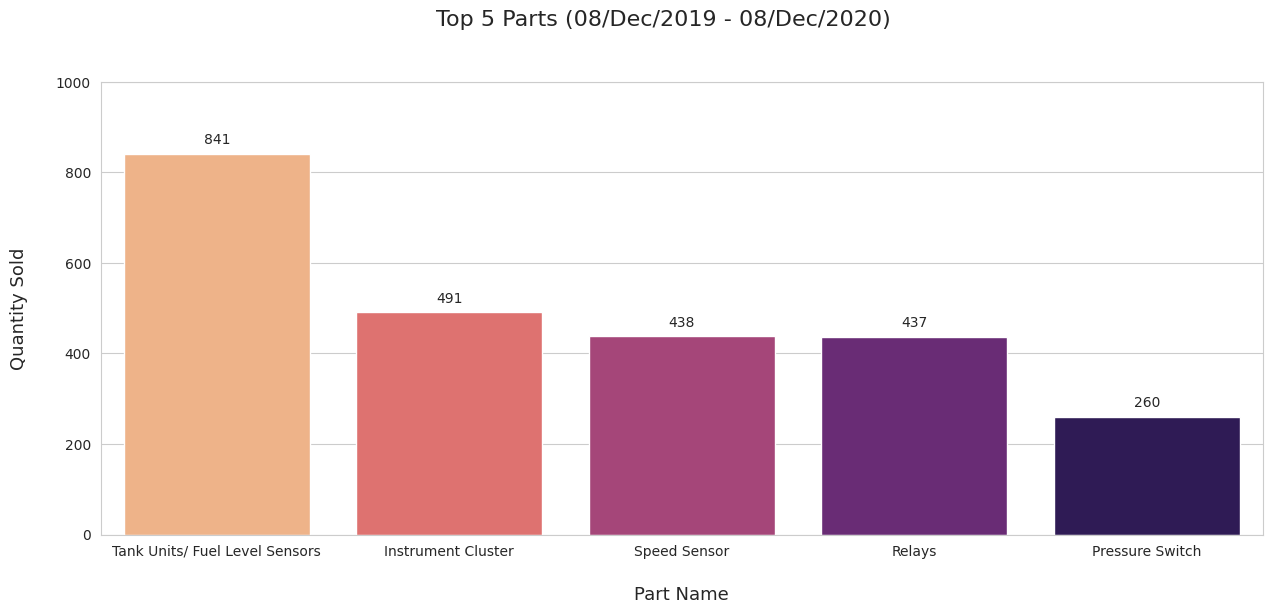

In [60]:
#@title **Top 5 Parts 08/Dec/2019 - 08/Dec/2020**
sns.set_style('whitegrid')

filt = (df['order_date'] >= pd.to_datetime('2019-12-08')) & (df['order_date'] < pd.to_datetime('2020-12-08'))
ndf = df[filt]
top_5_part_name = ndf.groupby('part_name').agg({'quantity':'count'}).sort_values('quantity', ascending=False).head()
top_5_part_name = top_5_part_name.reset_index()
top_5_part_name.rename(columns = {'quantity':'count'}, inplace = True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6), dpi=100)

sns.barplot(data=top_5_part_name,
            x='part_name',
            y='count',
            palette='magma_r',
            ax=ax)

ax.set_xlabel('Part Name', size=13,  labelpad=20)
ax.set_ylabel('Quantity Sold', size=13,  labelpad=20)
ax.set_xticklabels(top_5_part_name.part_name.tolist())
# , rotation = 15, ha='right',rotation_mode='anchor')
ax.set_ylim(0, 1000)
add_value_labels_int(ax)
fig.suptitle('Top 5 Parts (08/Dec/2019 - 08/Dec/2020)', size=16, y=1)
fig.savefig('Top 5 Parts (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show() 

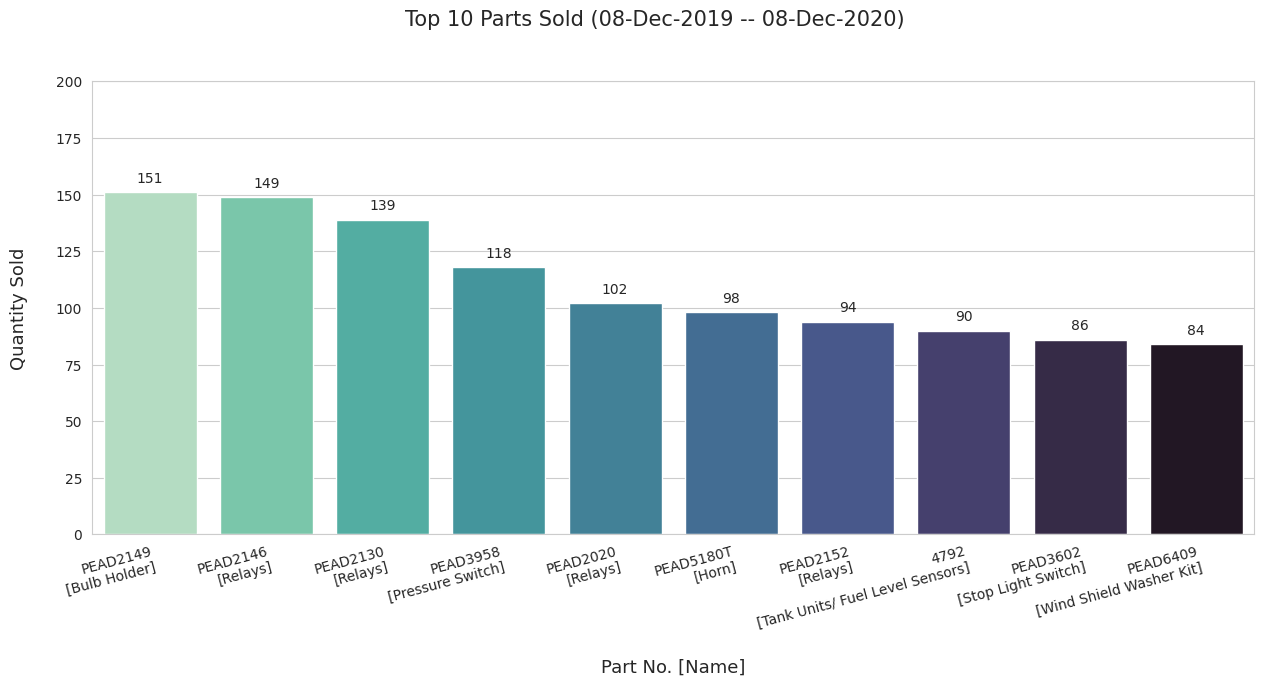

In [61]:
#@title **Top 5 Parts 08/Dec/2019 - 08/Dec/2020**
sns.set_style('whitegrid')

def get_part_name(part_no):
  for _, key, value in p_map_df.itertuples():
    if part_no in value:
      return key

filt = (df['order_date'] >= pd.to_datetime('2019-12-08')) & (df['order_date'] < pd.to_datetime('2020-12-08'))
ndf = df[filt]
top_10_part_no = df.groupby('part_no').agg({'quantity':'count'}).sort_values('quantity', ascending=False).head(10)
top_10_part_no = top_10_part_no.reset_index()
top_10_part_no.rename(columns = {'quantity':'count'}, inplace = True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6), dpi=100)


top_10_part_no['part_no'].apply(lambda x:get_part_name(x))

sns.barplot(data=top_10_part_no,
            x='part_no',
            y='count',
            palette='mako_r',
            ax=ax)

ax.set_xlabel('Part No. [Name]', size=13,  labelpad=20)
ax.set_ylabel('Quantity Sold', size=13,  labelpad=20)
ax.set_xticklabels(top_10_part_no['part_no'].apply(lambda x:f"{x}\n[{get_part_name(x)}]").values.tolist(),
                   rotation = 15, ha='right',rotation_mode='anchor')
ax.set_ylim(0, 200)
add_value_labels_int(ax)
# ax.set_title('Top 10 Parts Sold (08/Dec/2019 - 08/Dec/2020)', size=16)
fig.suptitle('Top 10 Parts Sold (08-Dec-2019 -- 08-Dec-2020)', fontsize=15, y=1)
fig.savefig('Top 10 Parts Sold (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show() 

In [62]:
df['order_date'].min(), df['order_date'].max()

(Timestamp('2019-06-13 00:00:00'), Timestamp('2021-01-04 00:00:00'))

In [63]:
def clean_seg_val(segment):
  if segment == '4 Wheeler':
    return '4WH'
  elif segment == 'TRACTORS':
    return 'Tractor'
  elif segment == 'Three Wheeler':
    return '3WH'
  elif segment == 'Two Wheeler':
    return '2WH'
  else:
    return segment  

In [64]:
df['segment'] = df['segment'].apply(lambda x:clean_seg_val(x))

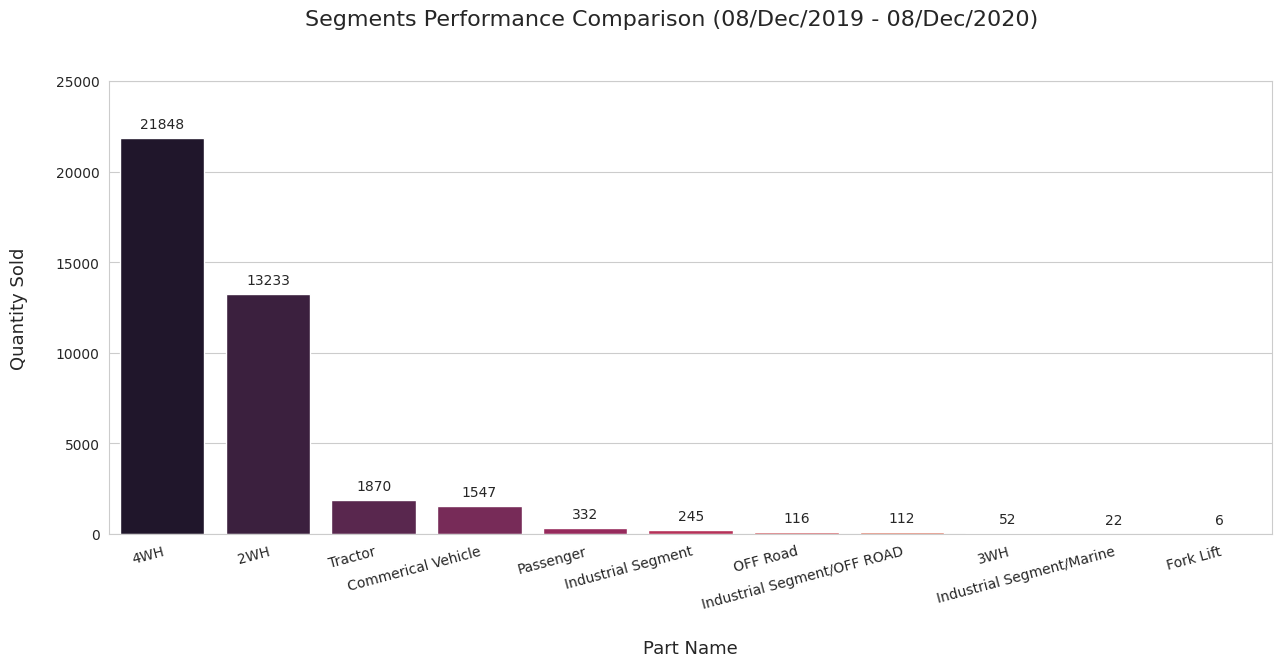

In [65]:
#@title **Segments Performance 08/Dec/2019 - 08/Dec/2020**
sns.set_style('whitegrid')

filt = (df['order_date'] >= pd.to_datetime('2019-12-08')) & (df['order_date'] < pd.to_datetime('2020-12-08'))
ndf = df[filt]

seg_quant_df = ndf.groupby('segment').agg({'quantity':'sum'}).reset_index()
seg_quant_df = seg_quant_df.rename(columns = {'quantity':'count'})
seg_quant_df = seg_quant_df.sort_values(by='count', ascending=False)
seg_quant_df = seg_quant_df.reset_index(drop=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6), dpi=100)

sns.barplot(data=seg_quant_df,
            x='segment',
            y='count',
            palette='rocket',
            ax=ax)

ax.set_xlabel('Part Name', size=13,  labelpad=20)
ax.set_ylabel('Quantity Sold', size=13,  labelpad=20)
ax.set_xticklabels(seg_quant_df.segment.tolist(), rotation=15, ha='right',rotation_mode='anchor')
ax.set_ylim(0, 25000)
add_value_labels_int(ax)
fig.suptitle('Segments Performance Comparison (08/Dec/2019 - 08/Dec/2020)', size=16, y=1)
fig.savefig('Segments Performance Comparison (08-Dec-2019 -- 08-Dec-2020).jpg')
plt.show() 

In [66]:
import math
def roundup(x):
  if x < 1000:
    return int(math.ceil(x / 100.0)) * 100
  elif x > 1000:
    return int(math.ceil(x / 1000.0)) * 1000

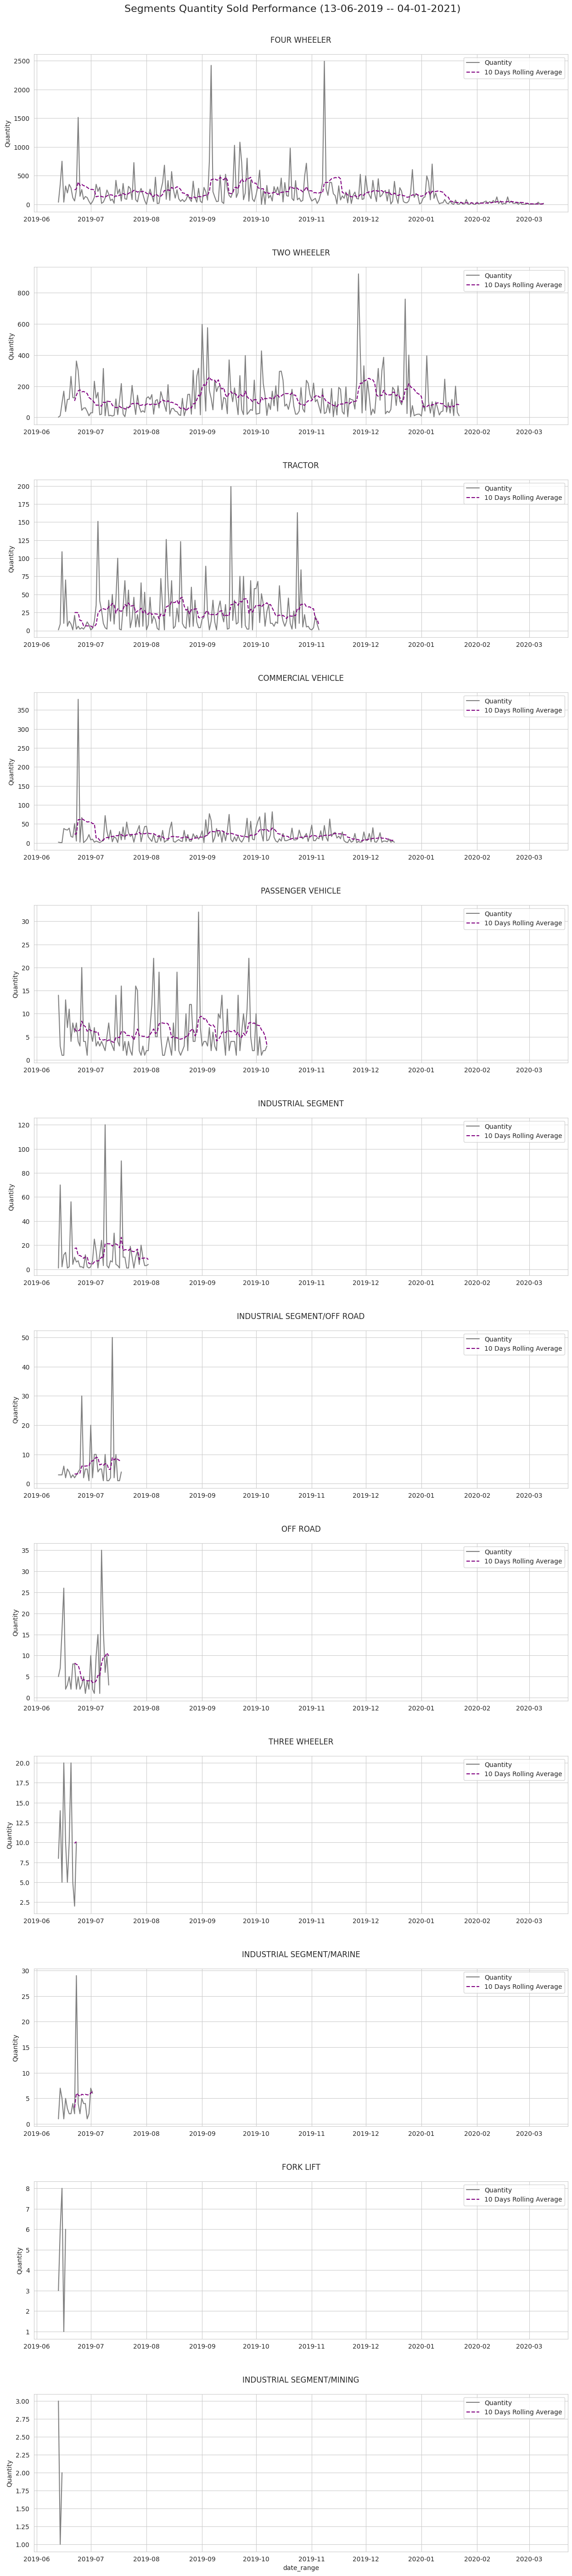

In [67]:
#@title **All Segments-Quantity-All Time**
fig, ax = plt.subplots(nrows=12, ncols=1, sharex=True, figsize=(15, 72), dpi=100)

x_axis = pd.date_range(df['order_date'].min(), df['order_date'].max())

# FOUR WHEELER
seg_df = df[df['segment'] == '4WH']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[0])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[0])

ax[0].set_ylabel('Quantity')
ax[0].legend(['Quantity', '10 Days Rolling Average'])
ax[0].set_title('FOUR WHEELER', size=12, y=1.05)
ax[0].tick_params('x', labelbottom=True)

# TWO WHEELER
seg_df = df[df['segment'] == '2WH']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[1])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[1])

ax[1].set_ylabel('Quantity')
ax[1].legend(['Quantity', '10 Days Rolling Average'])
ax[1].set_title('TWO WHEELER', size=12, y=1.05)
ax[1].tick_params('x', labelbottom=True)

# TRACTOR
seg_df = df[df['segment'] == 'Tractor']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[2])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[2])

ax[2].set_ylabel('Quantity')
ax[2].legend(['Quantity', '10 Days Rolling Average'])
ax[2].set_title('TRACTOR', size=12, y=1.05)
ax[2].tick_params('x', labelbottom=True)

# COMMERCIAL VEHICLE
seg_df = df[df['segment'] == 'Commerical Vehicle']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[3])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[3])

ax[3].set_ylabel('Quantity')
ax[3].legend(['Quantity', '10 Days Rolling Average'])
ax[3].set_title('COMMERCIAL VEHICLE', size=12, y=1.05)
ax[3].tick_params('x', labelbottom=True)

# PASSENGER VEHICLE
seg_df = df[df['segment'] == 'Passenger']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[4])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[4])

ax[4].set_ylabel('Quantity')
ax[4].legend(['Quantity', '10 Days Rolling Average'])
ax[4].set_title('PASSENGER VEHICLE', size=12, y=1.05)
ax[4].tick_params('x', labelbottom=True)

# INDUSTRIAL SEGMENT
seg_df = df[df['segment'] == 'Industrial Segment']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[5])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[5])

ax[5].set_ylabel('Quantity')
ax[5].legend(['Quantity', '10 Days Rolling Average'])
ax[5].set_title('INDUSTRIAL SEGMENT', size=12, y=1.05)
ax[5].tick_params('x', labelbottom=True)


#INDUSTRIAL SEGMENT/OFF ROAD
seg_df = df[df['segment'] == 'Industrial Segment/OFF ROAD']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[6])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[6])

ax[6].set_ylabel('Quantity')
ax[6].legend(['Quantity', '10 Days Rolling Average'])
ax[6].set_title('INDUSTRIAL SEGMENT/OFF ROAD', size=12, y=1.05)
ax[6].tick_params('x', labelbottom=True)

#OFF ROAD
seg_df = df[df['segment'] == 'OFF Road']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[7])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[7])

ax[7].set_ylabel('Quantity')
ax[7].legend(['Quantity', '10 Days Rolling Average'])
ax[7].set_title('OFF ROAD', size=12, y=1.05)
ax[7].tick_params('x', labelbottom=True)

#3WH
seg_df = df[df['segment'] == '3WH']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[8])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[8])

ax[8].set_ylabel('Quantity')
ax[8].legend(['Quantity', '10 Days Rolling Average'])
ax[8].set_title('THREE WHEELER', size=12, y=1.05)
ax[8].tick_params('x', labelbottom=True)

#INDUSTRIAL SEGMENT/MARINE
seg_df = df[df['segment'] == 'Industrial Segment/Marine']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[9])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[9])

ax[9].set_ylabel('Quantity')
ax[9].legend(['Quantity', '10 Days Rolling Average'])
ax[9].set_title('INDUSTRIAL SEGMENT/MARINE', size=12, y=1.05)
ax[9].tick_params('x', labelbottom=True)

# FORK LIFT  
seg_df = df[df['segment'] == 'Fork Lift']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[10])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[10])

ax[10].set_ylabel('Quantity')
ax[10].legend(['Quantity', '10 Days Rolling Average'])
ax[10].set_title('FORK LIFT', size=12, y=1.05)
ax[10].tick_params('x', labelbottom=True)


# INDUSTRIAL SEGMENT/MINING
seg_df = df[df['segment'] == 'Industrial Segment/Mining']
seg_df = seg_df.groupby('order_date').agg({'quantity':'sum'}).reset_index()
seg_df['date_range'] = pd.Series(pd.date_range(df['order_date'].min(), df['order_date'].max()))
seg_df['10 Days Rolling Average'] = seg_df['quantity'].rolling(10).mean()
seg_df = seg_df.fillna(np.nan)

sns.lineplot(data=seg_df,
             x='date_range',
             y='quantity',             
             color='grey',
             ax=ax[11])

sns.lineplot(data=seg_df,
             x='date_range',
             y='10 Days Rolling Average',
             color='purple',
             linestyle='--',
             ax=ax[11])

ax[11].set_ylabel('Quantity')
ax[11].legend(['Quantity', '10 Days Rolling Average'])
ax[11].set_title('INDUSTRIAL SEGMENT/MINING', size=12, y=1.05)
ax[11].tick_params('x', labelbottom=True)

fig.suptitle('Segments Quantity Sold Performance (13-06-2019 -- 04-01-2021)', size=16, y=0.895)
plt.subplots_adjust(hspace=0.35)
fig.savefig('Segments Quantity Sold Performance (13-06-2019 -- 04-01-2021).jpg')
plt.show()

In [71]:
df.head()

order_id order_date  day day_of_week  month  year  year_month  quarter  \
0  CP0001584 2019-12-31   31     Tuesday     12  2019      201912        4   
1  CP0001584 2019-12-31   31     Tuesday     12  2019      201912        4   
2  CP0001584 2019-12-31   31     Tuesday     12  2019      201912        4   
3  CP0001586 2019-12-31   31     Tuesday     12  2019      201912        4   
4  CP0001588 2019-12-31   31     Tuesday     12  2019      201912        4   

  customer_type                         shop_name executive_name  \
0      retailer     shribeeralingeswarautomobiles  harishchillal   
1      retailer     shribeeralingeswarautomobiles  harishchillal   
2      retailer     shribeeralingeswarautomobiles  harishchillal   
3      retailer   tamilnaduautomobiles-dharmapuri       aravinth   
4      retailer  jayalakshmiautowings-dharamapuri       aravinth   

  distributor_name   part_no               part_name segment  quantity  \
0  omegaautomotive  PEAD3280         Pressure Switch     4WH         5   
1  omegaautomotive  PEAD3512       Stop Light Switch     4WH         4   
2  omegaautomotive  PEAD6409  Wind Shield Washer Kit     4WH        10   
3              tvs  PEAD6413  Wind Shield Washer Kit     4WH         1   
4              tvs  PEAD3932         Pressure Switch     4WH         3   

   unit_price  total_price  
0         187          935  
1          84          336  
2         344         3440  
3         995          995  
4         236          708